In [10]:
from __future__ import print_function, division
import pandas as pd
import pylab as pl
import os
import csv
import seaborn
import statsmodels.formula.api as smf
import scipy.stats
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [11]:
weather = pd.read_csv('../Final_Data/London_weather_data_2011_2014.csv', parse_dates=[0], infer_datetime_format=True)
weather.iloc[:,1:].convert_objects(convert_numeric=True)
weather.columns

C:\Users\Hrafnkell\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


Index([u'Unnamed: 0', u'Datetime', u'Dew_Point_F', u'Humidity',
       u'Temperature_F', u'Wind_Speed_MPH'],
      dtype='object')

In [12]:
weather.index = pd.DatetimeIndex(weather.Datetime)

In [13]:
weather.head()

Unnamed: 0             Datetime  Dew_Point_F  Humidity  \
2011-11-01 01:00:00          0  2011-11-01 01:00:00         51.8      88.0   
2011-11-01 02:00:00          1  2011-11-01 02:00:00         53.6      94.0   
2011-11-01 03:00:00          2  2011-11-01 03:00:00         53.6      88.0   
2011-11-01 04:00:00          3  2011-11-01 04:00:00         53.6      88.0   
2011-11-01 05:00:00          4  2011-11-01 05:00:00         53.6      88.0   

                     Temperature_F  Wind_Speed_MPH  
2011-11-01 01:00:00           55.4             6.9  
2011-11-01 02:00:00           55.4             8.1  
2011-11-01 03:00:00           57.2             9.2  
2011-11-01 04:00:00           57.2             9.2  
2011-11-01 05:00:00           57.2             8.1

In [14]:
# slicing out 2013 data
weather2013 = weather[weather.index.year == 2013]
weather2012 = weather[weather.index.year == 2012]

In [15]:
weather2013.head()

Unnamed: 0             Datetime  Dew_Point_F  Humidity  \
2013-01-01 00:00:00      10221  2013-01-01 00:00:00         44.6      87.0   
2013-01-01 01:00:00      10222  2013-01-01 01:00:00         44.6      87.0   
2013-01-01 02:00:00      10223  2013-01-01 02:00:00         44.6      93.0   
2013-01-01 03:00:00      10224  2013-01-01 03:00:00         41.0      77.0   
2013-01-01 04:00:00      10225  2013-01-01 04:00:00         41.0      87.0   

                     Temperature_F  Wind_Speed_MPH  
2013-01-01 00:00:00           48.2             9.2  
2013-01-01 01:00:00           48.2            10.4  
2013-01-01 02:00:00           46.4            12.7  
2013-01-01 03:00:00           46.0             9.2  
2013-01-01 04:00:00           44.6            10.4

In [16]:
energy2013 = pd.read_csv('../Final_Data/energy_final_2013.csv', parse_dates=[0], infer_datetime_format=True)
energy2013.iloc[:,1:].convert_objects(convert_numeric=True)
energy2013.columns

C:\Users\Hrafnkell\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  from ipykernel import kernelapp as app


Index([u'Unnamed: 0', u'DateTime', u'Adversity', u'Affluent', u'Comfortable',
       u'Overall'],
      dtype='object')

In [18]:
energy2013.index = pd.DatetimeIndex(energy2013.DateTime)

In [19]:
energy2013.drop(['Unnamed: 0'], axis=1, inplace=True)

In [20]:
energy2013.columns = [['Datetime', 'Low_Income', 'High_Income', 'Middle_Income', 'Overall']]

In [21]:
energy2013.head()

Datetime  Low_Income  High_Income  \
2013-01-01 00:00:00  2013-01-01 00:00:00    0.214885     0.284734   
2013-01-01 01:00:00  2013-01-01 01:00:00    0.387206     0.499935   
2013-01-01 02:00:00  2013-01-01 02:00:00    0.318111     0.429294   
2013-01-01 03:00:00  2013-01-01 03:00:00    0.263513     0.367315   
2013-01-01 04:00:00  2013-01-01 04:00:00    0.231694     0.324253   

                     Middle_Income   Overall  
2013-01-01 00:00:00       0.244850  0.250803  
2013-01-01 01:00:00       0.426540  0.442699  
2013-01-01 02:00:00       0.351710  0.371424  
2013-01-01 03:00:00       0.288224  0.311469  
2013-01-01 04:00:00       0.253951  0.274516

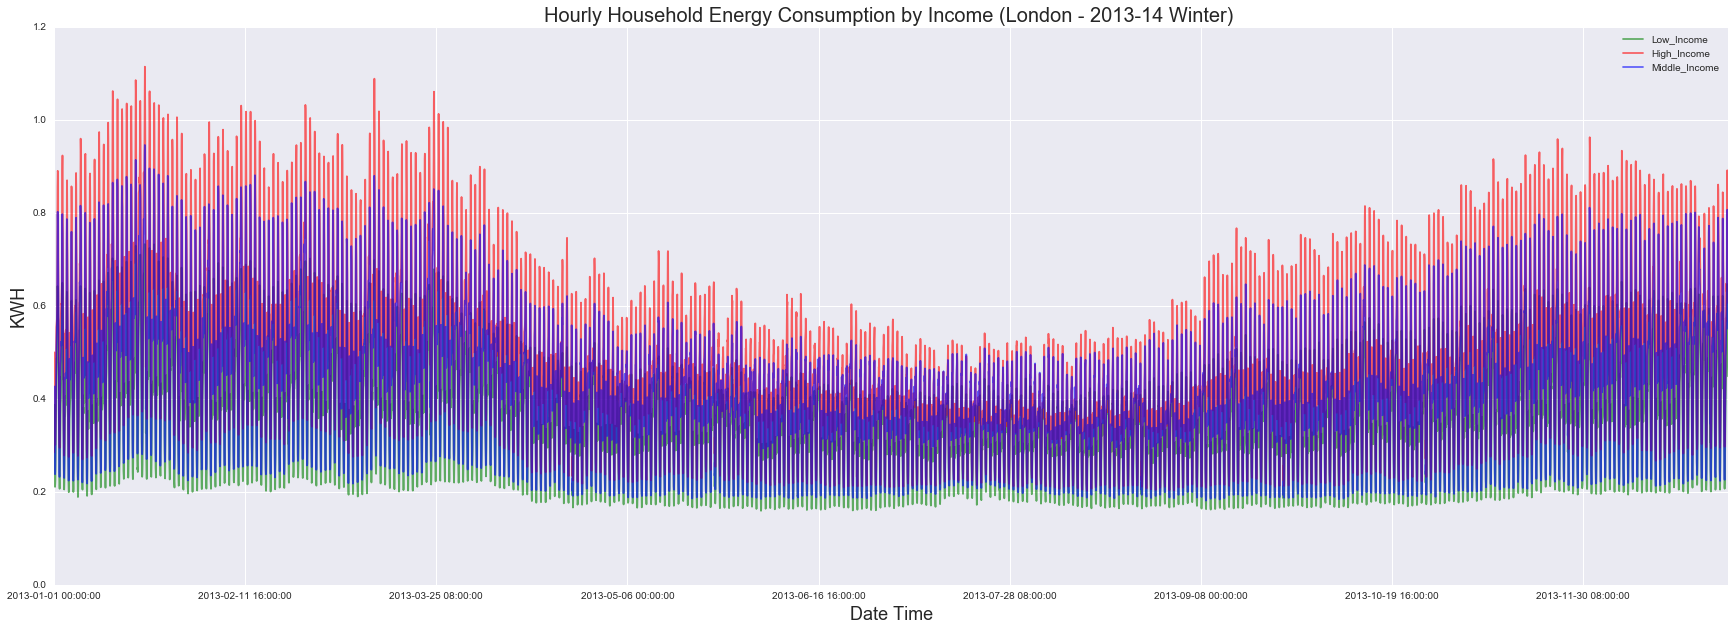

In [22]:
ax = pl.figure(figsize=(30,10)).add_subplot(111)
energy2013.plot(x='Datetime', y='Low_Income', color='Green',alpha=.6, ax=ax)
energy2013.plot(x='Datetime', y='High_Income', color='Red', alpha=.6, ax=ax)
energy2013.plot(x='Datetime', y='Middle_Income', color='Blue',alpha=.6, ax=ax)
pl.title('Hourly Household Energy Consumption by Income (London - 2013-14 Winter) ', fontsize=20)
pl.ylabel("KWH", fontsize=18)
pl.xlabel("Date Time", fontsize=18)

In [23]:
#weather = weather.convert_objects(convert_numeric=True)
#weather1 = weather[:2136]
weather2013.drop('Unnamed: 0', 1, inplace=True)
weather2013.head()

C:\Users\Hrafnkell\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


Datetime  Dew_Point_F  Humidity  \
2013-01-01 00:00:00  2013-01-01 00:00:00         44.6      87.0   
2013-01-01 01:00:00  2013-01-01 01:00:00         44.6      87.0   
2013-01-01 02:00:00  2013-01-01 02:00:00         44.6      93.0   
2013-01-01 03:00:00  2013-01-01 03:00:00         41.0      77.0   
2013-01-01 04:00:00  2013-01-01 04:00:00         41.0      87.0   

                     Temperature_F  Wind_Speed_MPH  
2013-01-01 00:00:00           48.2             9.2  
2013-01-01 01:00:00           48.2            10.4  
2013-01-01 02:00:00           46.4            12.7  
2013-01-01 03:00:00           46.0             9.2  
2013-01-01 04:00:00           44.6            10.4

In [24]:
energy2013.reset_index(inplace=True)
energy2013.head()

index             Datetime  Low_Income  High_Income  \
0 2013-01-01 00:00:00  2013-01-01 00:00:00    0.214885     0.284734   
1 2013-01-01 01:00:00  2013-01-01 01:00:00    0.387206     0.499935   
2 2013-01-01 02:00:00  2013-01-01 02:00:00    0.318111     0.429294   
3 2013-01-01 03:00:00  2013-01-01 03:00:00    0.263513     0.367315   
4 2013-01-01 04:00:00  2013-01-01 04:00:00    0.231694     0.324253   

   Middle_Income   Overall  
0       0.244850  0.250803  
1       0.426540  0.442699  
2       0.351710  0.371424  
3       0.288224  0.311469  
4       0.253951  0.274516

In [25]:
weather2013.reset_index(inplace=True)
weather2013.head()

index             Datetime  Dew_Point_F  Humidity  \
0 2013-01-01 00:00:00  2013-01-01 00:00:00         44.6      87.0   
1 2013-01-01 01:00:00  2013-01-01 01:00:00         44.6      87.0   
2 2013-01-01 02:00:00  2013-01-01 02:00:00         44.6      93.0   
3 2013-01-01 03:00:00  2013-01-01 03:00:00         41.0      77.0   
4 2013-01-01 04:00:00  2013-01-01 04:00:00         41.0      87.0   

   Temperature_F  Wind_Speed_MPH  
0           48.2             9.2  
1           48.2            10.4  
2           46.4            12.7  
3           46.0             9.2  
4           44.6            10.4

In [26]:
final2013 = pd.merge(weather2013, energy2013, on='index')

In [27]:
final2013.head()

index           Datetime_x  Dew_Point_F  Humidity  \
0 2013-01-01 00:00:00  2013-01-01 00:00:00         44.6      87.0   
1 2013-01-01 01:00:00  2013-01-01 01:00:00         44.6      87.0   
2 2013-01-01 02:00:00  2013-01-01 02:00:00         44.6      93.0   
3 2013-01-01 03:00:00  2013-01-01 03:00:00         41.0      77.0   
4 2013-01-01 04:00:00  2013-01-01 04:00:00         41.0      87.0   

   Temperature_F  Wind_Speed_MPH           Datetime_y  Low_Income  \
0           48.2             9.2  2013-01-01 00:00:00    0.214885   
1           48.2            10.4  2013-01-01 01:00:00    0.387206   
2           46.4            12.7  2013-01-01 02:00:00    0.318111   
3           46.0             9.2  2013-01-01 03:00:00    0.263513   
4           44.6            10.4  2013-01-01 04:00:00    0.231694   

   High_Income  Middle_Income   Overall  
0     0.284734       0.244850  0.250803  
1     0.499935       0.426540  0.442699  
2     0.429294       0.351710  0.371424  
3     0.367315       0.288224  0.311469  
4     0.324253       0.253951  0.274516

In [28]:
final2013.drop(['Datetime_x', 'Datetime_y'], axis=1, inplace=True)
final2013.head()

index  Dew_Point_F  Humidity  Temperature_F  Wind_Speed_MPH  \
0 2013-01-01 00:00:00         44.6      87.0           48.2             9.2   
1 2013-01-01 01:00:00         44.6      87.0           48.2            10.4   
2 2013-01-01 02:00:00         44.6      93.0           46.4            12.7   
3 2013-01-01 03:00:00         41.0      77.0           46.0             9.2   
4 2013-01-01 04:00:00         41.0      87.0           44.6            10.4   

   Low_Income  High_Income  Middle_Income   Overall  
0    0.214885     0.284734       0.244850  0.250803  
1    0.387206     0.499935       0.426540  0.442699  
2    0.318111     0.429294       0.351710  0.371424  
3    0.263513     0.367315       0.288224  0.311469  
4    0.231694     0.324253       0.253951  0.274516

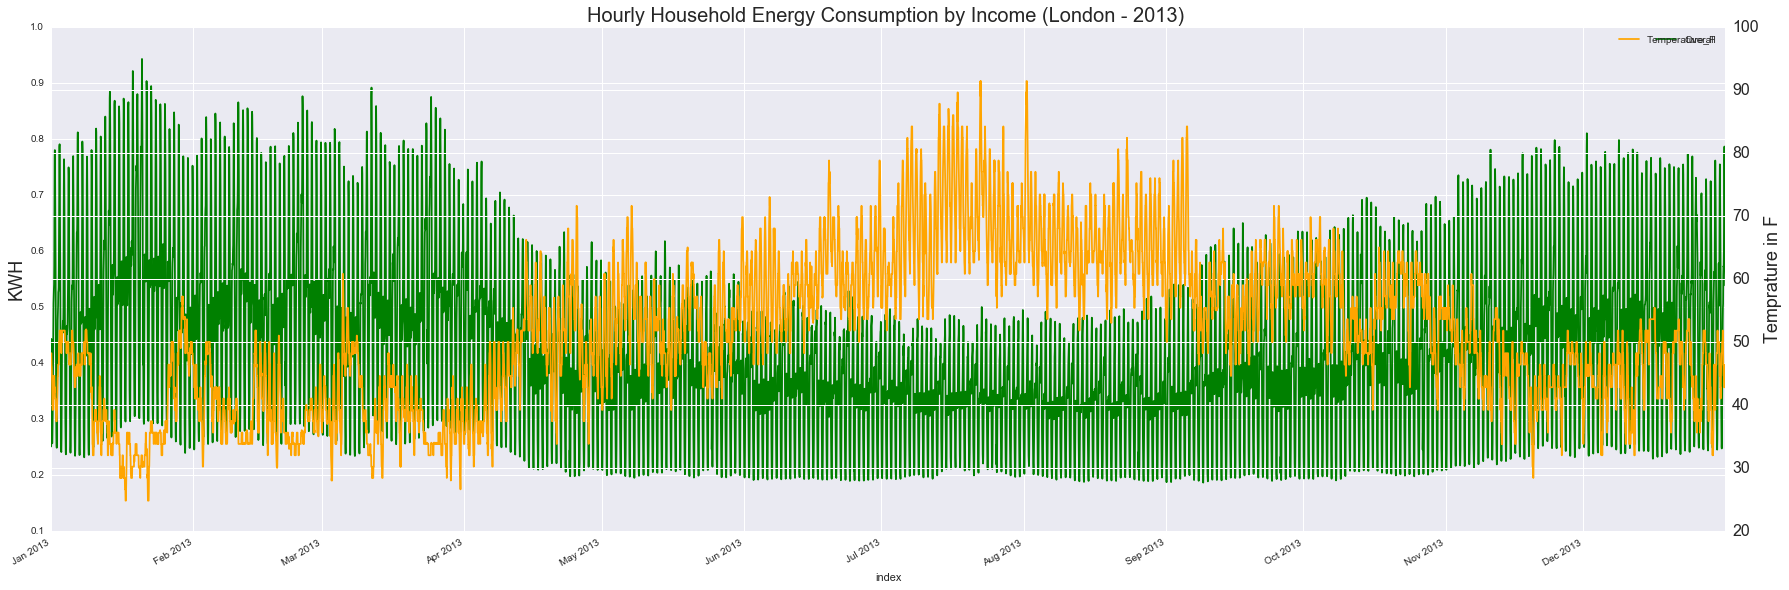

In [29]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
ax2 = ax1.twinx()
final2013.plot(x='index', y='Overall', color='Green',alpha=1, ax=ax1)
#final2013.plot(x='index', y='Low_Income', color='Green',alpha=.2, ax=ax1)
#final2013.plot(x='index', y='High_Income', color='Red', alpha=.1, ax=ax1)
#final2013.plot(x='index', y='Middle_Income', color='Blue',alpha=.1, ax=ax1)
final2013.plot(x='index', y='Temperature_F', fontsize=16, color='orange', alpha=1, ax=ax2)
pl.title('Hourly Household Energy Consumption by Income (London - 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax2.set_ylabel("Temprature in F", fontsize=18)
pl.xlabel("Date Time", fontsize=18)
#pl.xlim(500,548)

In [30]:
hours = 24

In [70]:
final2013['rollingmean_nrg'] = pd.rolling_mean(final2013.Overall, hours)
final2013['rollingmean_temp'] = pd.rolling_mean(final2013.Temperature_F, hours)
final2013['rollingmean_humidity'] = pd.rolling_mean(final2013.Humidity, hours)
final2013['rollingmean_wind'] = pd.rolling_mean(final2013.Wind_Speed_MPH, hours)
final2013['rollingmean_dew'] = pd.rolling_mean(final2013.Dew_Point_F, hours)

C:\Users\Hrafnkell\Anaconda2\lib\site-packages\ipykernel\__main__.py:1: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  if __name__ == '__main__':
C:\Users\Hrafnkell\Anaconda2\lib\site-packages\ipykernel\__main__.py:2: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  from ipykernel import kernelapp as app
C:\Users\Hrafnkell\Anaconda2\lib\site-packages\ipykernel\__main__.py:3: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,center=False).mean()
  app.launch_new_instance()
C:\Users\Hrafnkell\Anaconda2\lib\site-packages\ipykernel\__main__.py:4: FutureWarning: pd.rolling_mean is deprecated for Series and will be removed in a future version, replace with 
	Series.rolling(window=24,cen

In [72]:
final2013.tail(3)

DateTime  Dew_Point_F  Humidity  Temperature_F  \
8740 2013-12-31 21:00:00         37.4      81.0           42.8   
8741 2013-12-31 22:00:00         41.0      87.0           44.6   
8742 2013-12-31 23:00:00         42.8      87.0           46.4   

      Wind_Speed_MPH  Low_Income  High_Income  Middle_Income   Overall  \
8740             6.9    0.538989     0.758781       0.673501  0.662263   
8741            12.7    0.493306     0.676161       0.615117  0.598618   
8742            10.4    0.448380     0.605961       0.550477  0.538336   

      rollingmean_nrg  rollingmean_temp  rollingmean_humidity  \
8740         0.498698            46.175             87.583333   
8741         0.496952            46.250             87.583333   
8742         0.495932            46.475             87.333333   

      rollingmean_wind  rollingmean_dew  
8740         11.566667           42.725  
8741         11.808333           42.800  
8742         11.954167           42.950

## Rolling mean plots

### Energy vs. temp

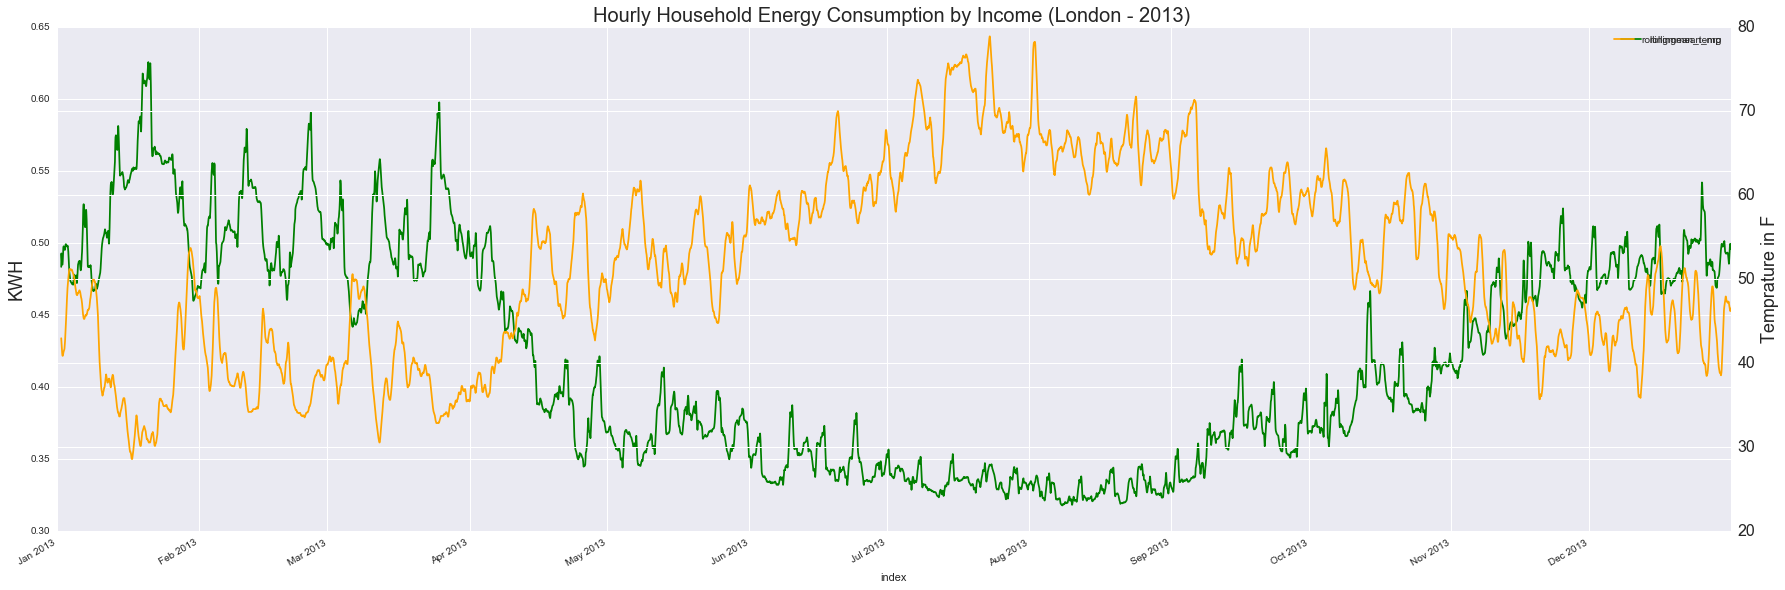

In [36]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
ax2 = ax1.twinx()
final2013.plot(x='index', y='rollingmean_nrg', color='Green',alpha=1, ax=ax1)
final2013.plot(x='index', y='rollingmean_temp', fontsize=16, color='orange', alpha=1, ax=ax2)
pl.title('Hourly Household Energy Consumption by Income (London - 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax2.set_ylabel("Temprature in F", fontsize=18)
pl.xlabel("Date Time", fontsize=18)
#pl.xlim(final2013.index[8000], final2013.index[8200])

### Energy vs. humidity

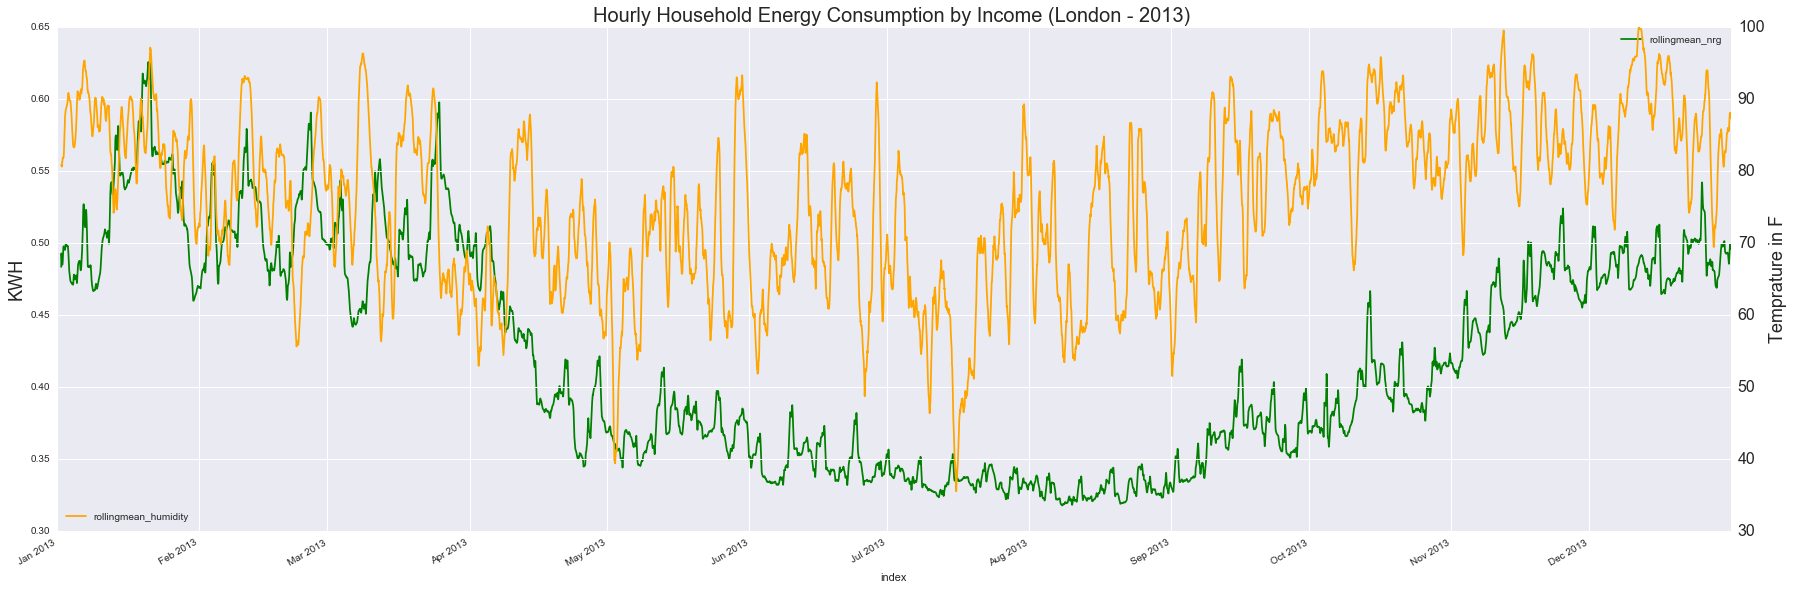

In [37]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
ax2 = ax1.twinx()
final2013.plot(x='index', y='rollingmean_nrg', color='Green',alpha=1, ax=ax1)
final2013.plot(x='index', y='rollingmean_humidity', fontsize=16, color='orange', alpha=1, ax=ax2)
pl.title('Hourly Household Energy Consumption by Income (London - 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax2.set_ylabel("Temprature in F", fontsize=18)
pl.xlabel("Date Time", fontsize=18)
#pl.xlim(500,548)

### Energy vs. wind

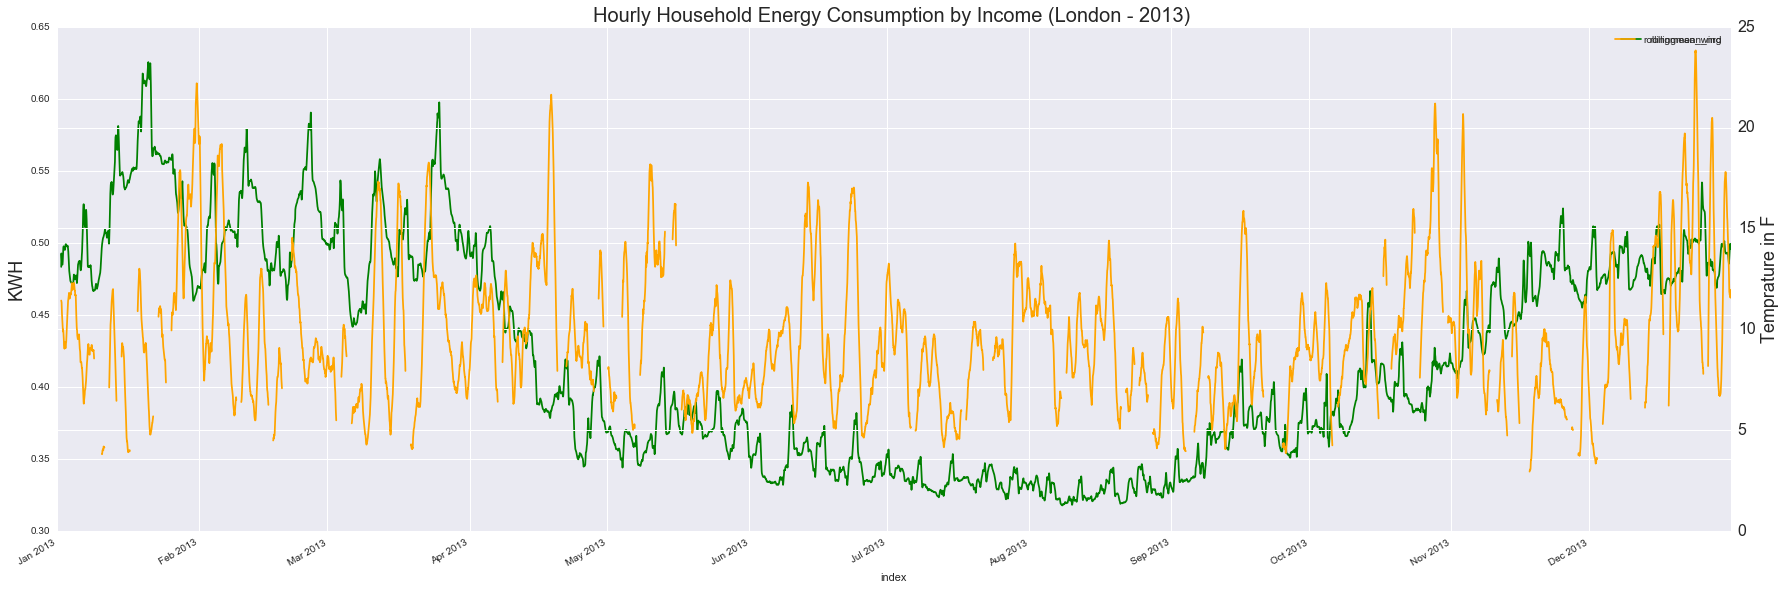

In [38]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
ax2 = ax1.twinx()
final2013.plot(x='index', y='rollingmean_nrg', color='Green',alpha=1, ax=ax1)
#final2013.plot(x='index', y='Low_Income', color='Green',alpha=.2, ax=ax1)
#final2013.plot(x='index', y='High_Income', color='Red', alpha=.1, ax=ax1)
#final2013.plot(x='index', y='Middle_Income', color='Blue',alpha=.1, ax=ax1)
final2013.plot(x='index', y='rollingmean_wind', fontsize=16, color='orange', alpha=1, ax=ax2)
pl.title('Hourly Household Energy Consumption by Income (London - 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax2.set_ylabel("Temprature in F", fontsize=18)
pl.xlabel("Date Time", fontsize=18)
#pl.xlim(500,548)

### Energy vs. dew point

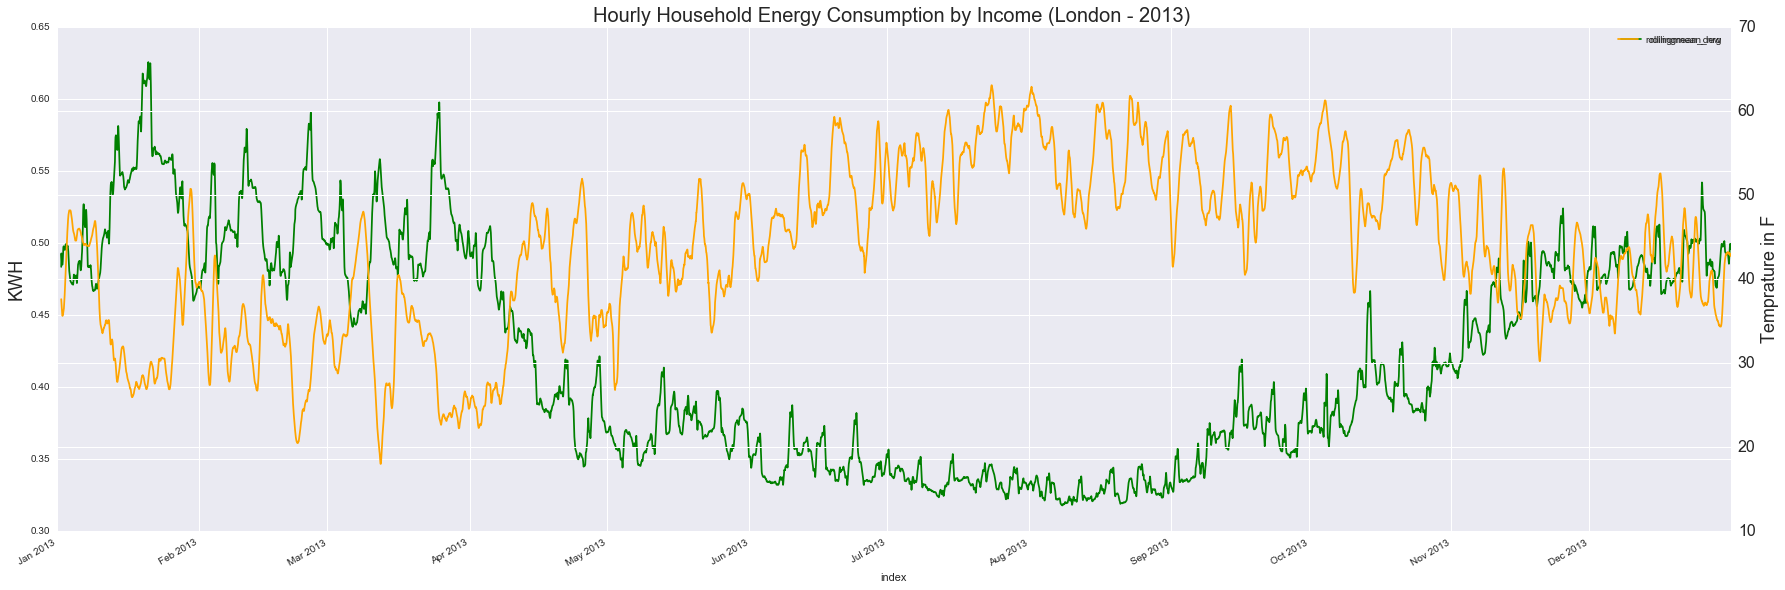

In [39]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
ax2 = ax1.twinx()
final2013.plot(x='index', y='rollingmean_nrg', color='Green',alpha=1, ax=ax1)
final2013.plot(x='index', y='rollingmean_dew', fontsize=16, color='orange', alpha=1, ax=ax2)
pl.title('Hourly Household Energy Consumption by Income (London - 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax2.set_ylabel("Temprature in F", fontsize=18)
pl.xlabel("Date Time", fontsize=18)
#pl.xlim(500,548)

In [44]:
#OLS of rolling mean energy consumption ~ rolling mean Temperature_F
reg_rolling_temp = smf.ols(formula = 'rollingmean_nrg ~ rollingmean_temp', data = final2013).fit()
reg_rolling_temp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        rollingmean_nrg   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.821
Method:                 Least Squares   F-statistic:                 3.993e+04
Date:                Fri, 09 Dec 2016   Prob (F-statistic):               0.00
Time:                        12:13:01   Log-Likelihood:                 17697.
No. Observations:                8720   AIC:                        -3.539e+04
Df Residuals:                    8718   BIC:                        -3.538e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            0.7358      0.002    455.734      0.000         0.733     0.739
rollingmean_temp    -0.0061   3.05e-05   -199.825      0.000        -0.006    -0.006
==============================================================================
Omnibus:                       75.499   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               77.312
Skew:                           0.229   Prob(JB):                     1.63e-17
Kurtosis:                       2.948   Cond. No.                         251.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [ ]:
regress1.rsquared

In [43]:
reg_rolling_wind = smf.ols(formula = 'rollingmean_nrg ~ rollingmean_wind', data = final2013).fit()
reg_rolling_humidity = smf.ols(formula = 'rollingmean_nrg ~ rollingmean_humidity', data = final2013).fit()
reg_rolling_dew = smf.ols(formula = 'rollingmean_nrg ~ rollingmean_dew', data = final2013).fit()

In [46]:
print ("Rsquared for temp: %.2f" %reg_rolling_temp.rsquared)
print ("Rsquared for wind: %.2f" %reg_rolling_wind.rsquared)
print ("Rsquared for humidity: %.2f" %reg_rolling_humidity.rsquared)
print ("Rsquared for dew point: %.2f" %reg_rolling_dew.rsquared)

Rsquared for temp: 0.82
Rsquared for wind: 0.02
Rsquared for humidity: 0.20
Rsquared for dew point: 0.61


## Summer

In [54]:
final2013.rename(columns={'index' : 'DateTime'}, inplace=True)

DateTime  Dew_Point_F  Humidity  Temperature_F  Wind_Speed_MPH  \
0 2013-01-01 00:00:00         44.6      87.0           48.2             9.2   
1 2013-01-01 01:00:00         44.6      87.0           48.2            10.4   
2 2013-01-01 02:00:00         44.6      93.0           46.4            12.7   

   Low_Income  High_Income  Middle_Income   Overall  rollingmean_nrg  \
0    0.214885     0.284734        0.24485  0.250803              NaN   
1    0.387206     0.499935        0.42654  0.442699              NaN   
2    0.318111     0.429294        0.35171  0.371424              NaN   

   rollingmean_temp  rollingmean_humidity  rollingmean_wind  rollingmean_dew  
0               NaN                   NaN               NaN              NaN  
1               NaN                   NaN               NaN              NaN  
2               NaN                   NaN               NaN              NaN

In [73]:
final2013.head(3)

DateTime  Dew_Point_F  Humidity  Temperature_F  Wind_Speed_MPH  \
0 2013-01-01 00:00:00         44.6      87.0           48.2             9.2   
1 2013-01-01 01:00:00         44.6      87.0           48.2            10.4   
2 2013-01-01 02:00:00         44.6      93.0           46.4            12.7   

   Low_Income  High_Income  Middle_Income   Overall  rollingmean_nrg  \
0    0.214885     0.284734        0.24485  0.250803              NaN   
1    0.387206     0.499935        0.42654  0.442699              NaN   
2    0.318111     0.429294        0.35171  0.371424              NaN   

   rollingmean_temp  rollingmean_humidity  rollingmean_wind  rollingmean_dew  
0               NaN                   NaN               NaN              NaN  
1               NaN                   NaN               NaN              NaN  
2               NaN                   NaN               NaN              NaN

In [74]:
final2013 = final2013.set_index(['DateTime'])

In [77]:
June = final2013[final2013.index.month == 6]
July = final2013[final2013.index.month == 7]
August = final2013[final2013.index.month == 8]
Summer_months = [June, July, August]
summer2013 = pd.concat(Summer_months)

In [78]:
summer2013.head(3)

Dew_Point_F  Humidity  Temperature_F  Wind_Speed_MPH  \
DateTime                                                                    
2013-06-01 00:00:00         48.2      72.0           57.2            10.4   
2013-06-01 01:00:00         48.2      77.0           55.4             9.2   
2013-06-01 02:00:00         44.6      72.0           53.6             6.9   

                     Low_Income  High_Income  Middle_Income   Overall  \
DateTime                                                                
2013-06-01 00:00:00    0.269250     0.330473       0.306636  0.303753   
2013-06-01 01:00:00    0.230842     0.278700       0.244765  0.253613   
2013-06-01 02:00:00    0.189835     0.245440       0.205539  0.216167   

                     rollingmean_nrg  rollingmean_temp  rollingmean_humidity  \
DateTime                                                                       
2013-06-01 00:00:00         0.351431            60.975             68.041667   
2013-06-01 01:00:00         0.351596            61.050             67.833333   
2013-06-01 02:00:00         0.351723            61.125             67.166667   

                     rollingmean_wind  rollingmean_dew  
DateTime                                                
2013-06-01 00:00:00          6.825000           50.075  
2013-06-01 01:00:00          6.966667           50.075  
2013-06-01 02:00:00          7.062500           49.925

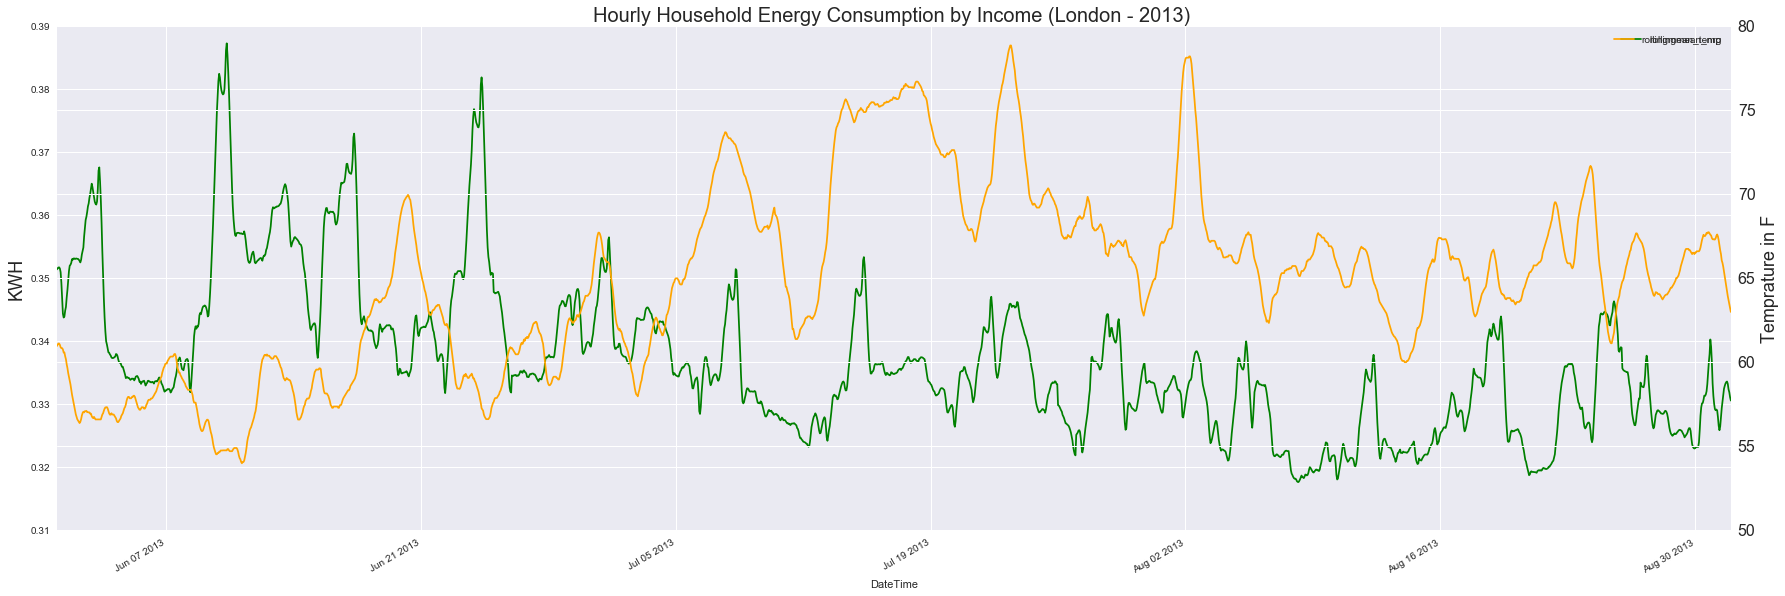

In [83]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
ax2 = ax1.twinx()
summer2013.plot(x=summer2013.index, y='rollingmean_nrg', color='Green',alpha=1, ax=ax1)
summer2013.plot(x=summer2013.index, y='rollingmean_temp', fontsize=16, color='orange', alpha=1, ax=ax2)
pl.title('Hourly Household Energy Consumption by Income (London - 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax2.set_ylabel("Temprature in F", fontsize=18)
pl.xlabel("Date Time", fontsize=18)
#pl.xlim(500,548)

In [84]:
#OLS of rolling mean energy consumption ~ rolling mean Temperature_F
summer_reg = smf.ols(formula = 'rollingmean_nrg ~ rollingmean_temp', data = summer2013).fit()
summer_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        rollingmean_nrg   R-squared:                       0.175
Model:                            OLS   Adj. R-squared:                  0.175
Method:                 Least Squares   F-statistic:                     469.0
Date:                Fri, 09 Dec 2016   Prob (F-statistic):           1.85e-94
Time:                        12:25:13   Log-Likelihood:                 6851.7
No. Observations:                2207   AIC:                        -1.370e+04
Df Residuals:                    2205   BIC:                        -1.369e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            0.3970      0.003    142.708      0.000         0.392     0.402
rollingmean_temp    -0.0009   4.27e-05    -21.657      0.000        -0.001    -0.001
==============================================================================
Omnibus:                      134.486   Durbin-Watson:                   0.008
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.099
Skew:                           0.626   Prob(JB):                     2.83e-35
Kurtosis:                       3.403   Cond. No.                         785.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Winter

In [85]:
Jan = final2013[final2013.index.month == 1]
Feb = final2013[final2013.index.month == 2]
Mar = final2013[final2013.index.month == 3]
Winter_months = [Jan, Feb, Mar]
winter2013 = pd.concat(Winter_months)

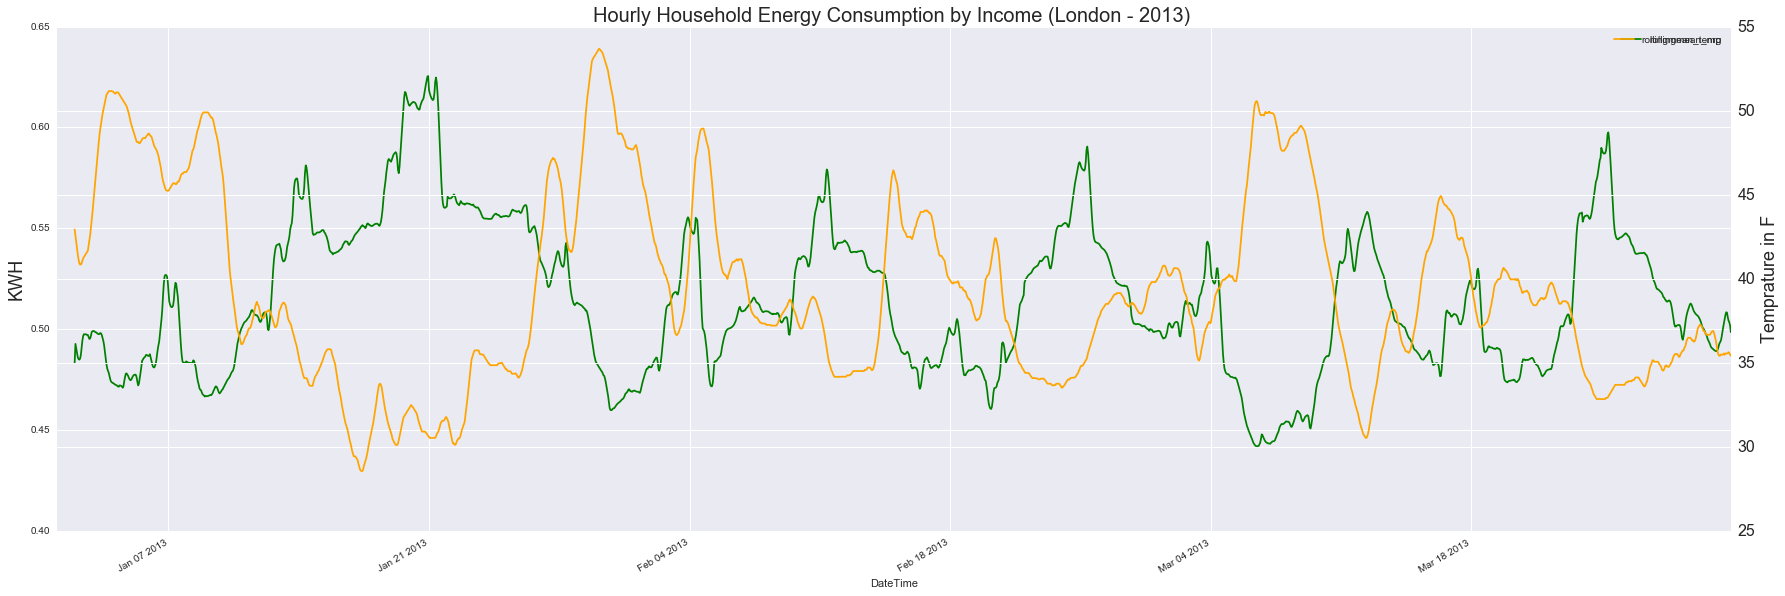

In [87]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
ax2 = ax1.twinx()
winter2013.plot(x=winter2013.index, y='rollingmean_nrg', color='Green',alpha=1, ax=ax1)
winter2013.plot(x=winter2013.index, y='rollingmean_temp', fontsize=16, color='orange', alpha=1, ax=ax2)
pl.title('Hourly Household Energy Consumption by Income (London - 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax2.set_ylabel("Temprature in F", fontsize=18)
pl.xlabel("Date Time", fontsize=18)
#pl.xlim(500,548)

In [88]:
#OLS of rolling mean energy consumption ~ rolling mean Temperature_F
winter_reg = smf.ols(formula = 'rollingmean_nrg ~ rollingmean_temp', data = winter2013).fit()
winter_reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        rollingmean_nrg   R-squared:                       0.555
Model:                            OLS   Adj. R-squared:                  0.555
Method:                 Least Squares   F-statistic:                     2661.
Date:                Fri, 09 Dec 2016   Prob (F-statistic):               0.00
Time:                        12:25:49   Log-Likelihood:                 4909.0
No. Observations:                2132   AIC:                            -9814.
Df Residuals:                    2130   BIC:                            -9803.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------------
Intercept            0.7067      0.004    187.971      0.000         0.699     0.714
rollingmean_temp    -0.0049   9.47e-05    -51.586      0.000        -0.005    -0.005
==============================================================================
Omnibus:                       98.854   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              112.314
Skew:                           0.561   Prob(JB):                     4.09e-25
Kurtosis:                       2.934   Cond. No.                         285.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Weekends

In [153]:
final2013['weekday'] = final2013.index.dayofweek
final2013.head(3)

DateTime  Dew_Point_F  Humidity  Temperature_F  \
2013-01-01 00:00:00 2013-01-01 00:00:00         44.6      87.0           48.2   
2013-01-01 01:00:00 2013-01-01 01:00:00         44.6      87.0           48.2   
2013-01-01 02:00:00 2013-01-01 02:00:00         44.6      93.0           46.4   

                     Wind_Speed_MPH  Low_Income  High_Income  Middle_Income  \
2013-01-01 00:00:00             9.2    0.214885     0.284734        0.24485   
2013-01-01 01:00:00            10.4    0.387206     0.499935        0.42654   
2013-01-01 02:00:00            12.7    0.318111     0.429294        0.35171   

                      Overall  rollingmean_nrg  rollingmean_temp  \
2013-01-01 00:00:00  0.250803              NaN               NaN   
2013-01-01 01:00:00  0.442699              NaN               NaN   
2013-01-01 02:00:00  0.371424              NaN               NaN   

                     rollingmean_humidity  rollingmean_wind  rollingmean_dew  \
2013-01-01 00:00:00                   NaN               NaN              NaN   
2013-01-01 01:00:00                   NaN               NaN              NaN   
2013-01-01 02:00:00                   NaN               NaN              NaN   

                     weekday  
2013-01-01 00:00:00        1  
2013-01-01 01:00:00        1  
2013-01-01 02:00:00        1

In [169]:
Saturdays = final2013[final2013.weekday == 5]
Sundays = final2013[final2013.weekday == 6]
weekend = [Saturdays, Sundays]
weekends2013 = pd.concat(weekend)

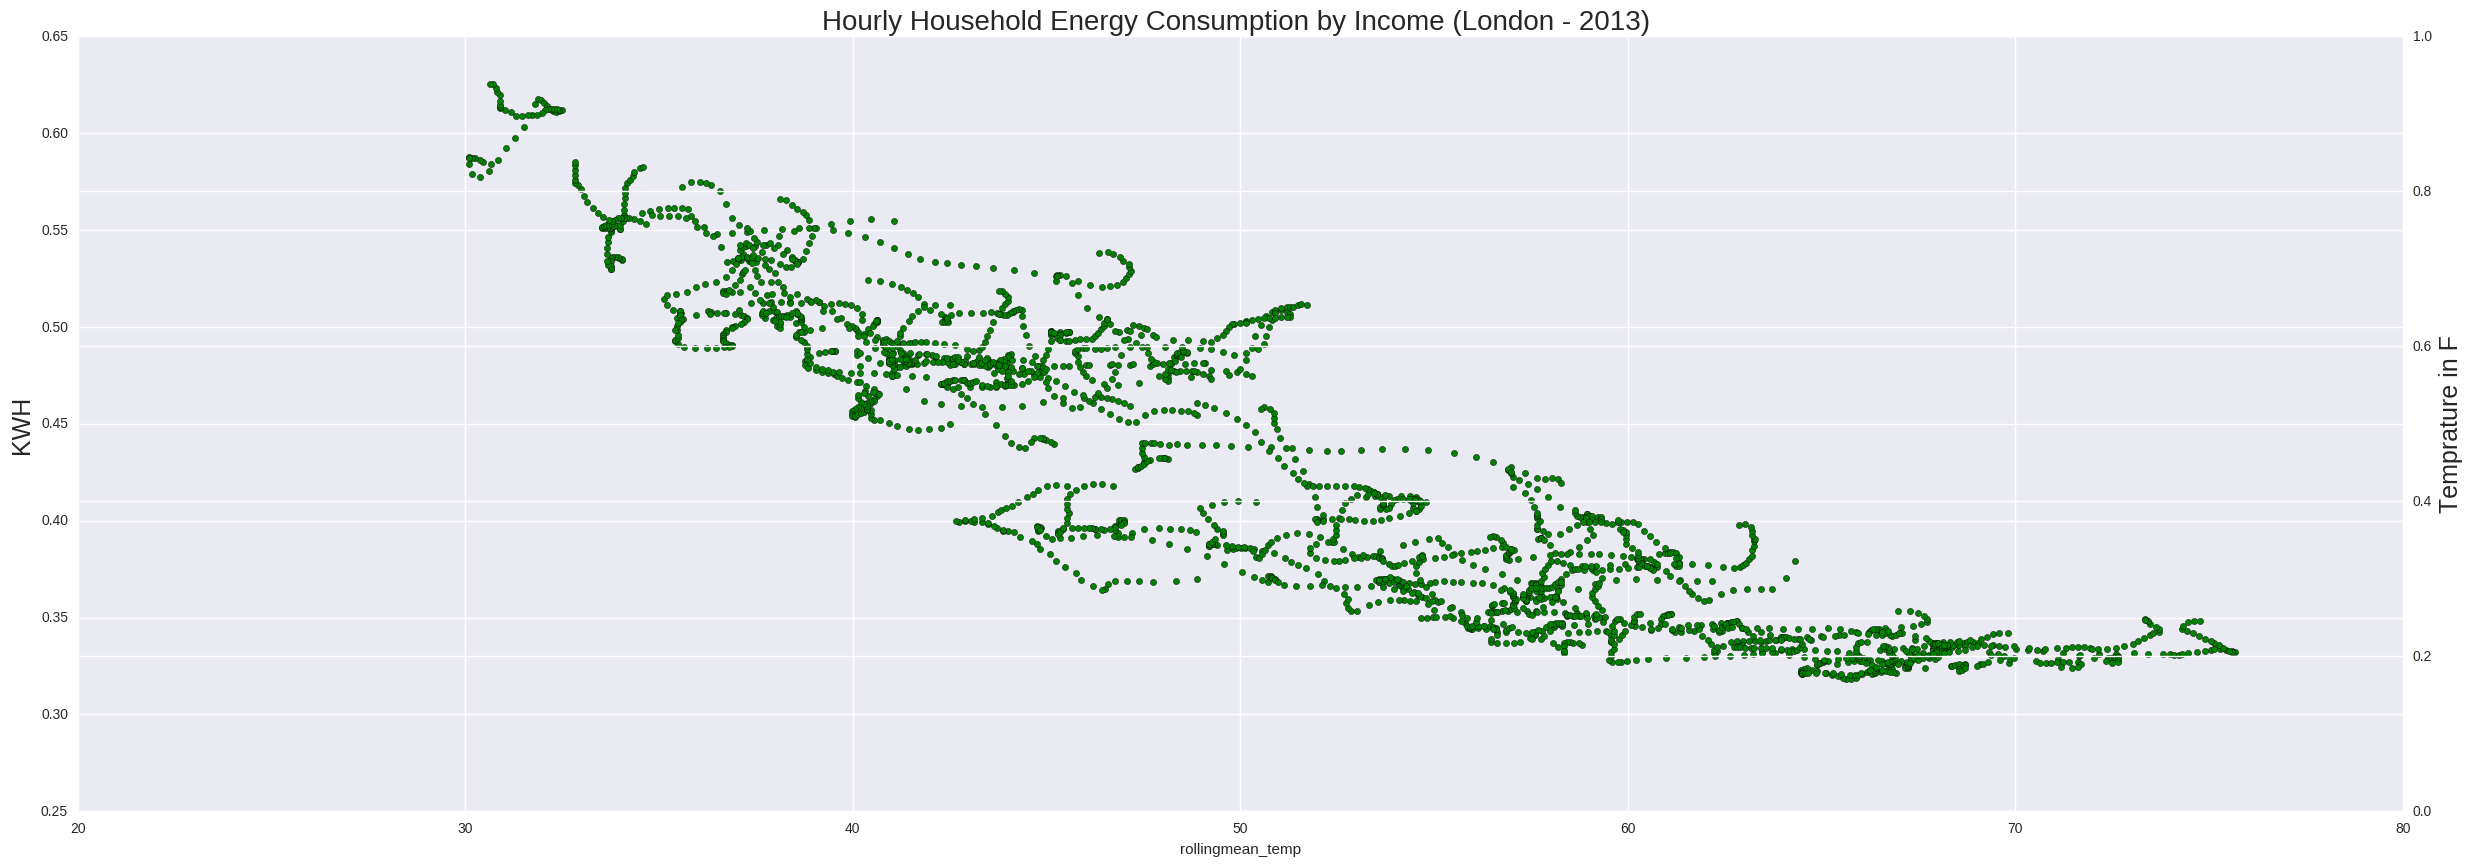

In [176]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
ax2 = ax1.twinx()
weekends2013.plot(kind='scatter', x='rollingmean_temp', y='rollingmean_nrg', color='Green',alpha=1, ax=ax1)
#weekends2013.plot(kind='scatter', x='DateTime', y='rollingmean_temp', fontsize=16, color='orange', alpha=1, ax=ax2)
pl.title('Hourly Household Energy Consumption by Income (London - 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax2.set_ylabel("Temprature in F", fontsize=18)
pl.xlabel("Date Time", fontsize=18)
#pl.xlim(500,548)

## Weekdays 

In [177]:
Mon = final2013[final2013.weekday == 0]
Tue = final2013[final2013.weekday == 1]
Wed = final2013[final2013.weekday == 2]
Thu = final2013[final2013.weekday == 3]
Fri = final2013[final2013.weekday == 4]
weekdays = [Mon, Tue, Wed, Thu, Fri]
weekdays2013 = pd.concat(weekdays)

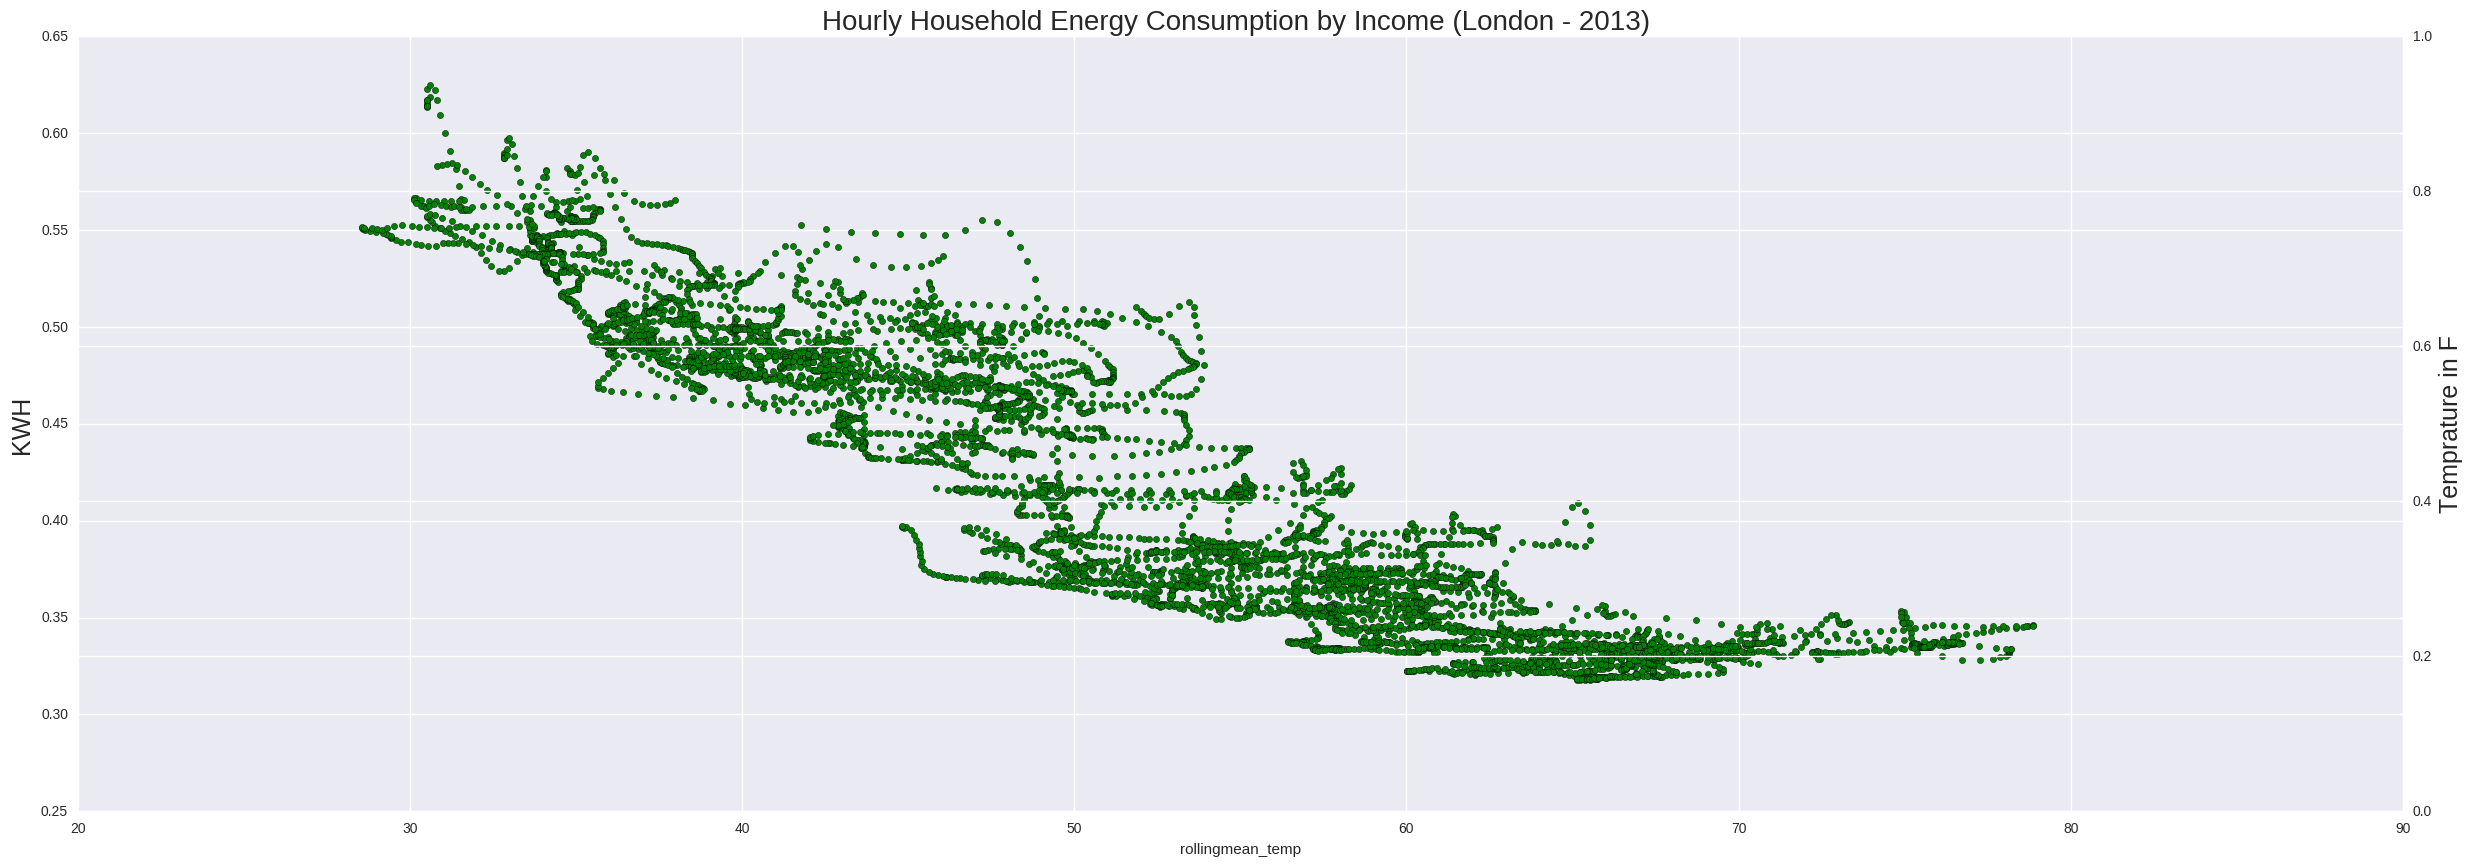

In [178]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
ax2 = ax1.twinx()
weekdays2013.plot(kind='scatter', x='rollingmean_temp', y='rollingmean_nrg', color='Green',alpha=1, ax=ax1)
#weekends2013.plot(kind='scatter', x='DateTime', y='rollingmean_temp', fontsize=16, color='orange', alpha=1, ax=ax2)
pl.title('Hourly Household Energy Consumption by Income (London - 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax2.set_ylabel("Temprature in F", fontsize=18)
pl.xlabel("Date Time", fontsize=18)
#pl.xlim(500,548)

## Multivariate regression

### Non-rolling mean

In [95]:
reg_multireg = smf.ols(formula = 'Overall ~ Temperature_F + Wind_Speed_MPH + Humidity', data = final2013).fit()
reg_multireg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                Overall   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.159
Method:                 Least Squares   F-statistic:                     545.3
Date:                Fri, 09 Dec 2016   Prob (F-statistic):               0.00
Time:                        13:22:53   Log-Likelihood:                 4867.2
No. Observations:                8634   AIC:                            -9726.
Df Residuals:                    8630   BIC:                            -9698.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------
Intercept          0.7734      0.013     58.084      0.000         0.747     0.799
Temperature_F     -0.0051      0.000    -37.267      0.000        -0.005    -0.005
Wind_Speed_MPH     0.0050      0.000     15.631      0.000         0.004     0.006
Humidity          -0.0017      0.000    -17.240      0.000        -0.002    -0.002
==============================================================================
Omnibus:                      304.936   Durbin-Watson:                   0.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              335.900
Skew:                           0.479   Prob(JB):                     1.15e-73
Kurtosis:                       2.874   Cond. No.                         836.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Rolling mean

In [89]:
reg_rolling_multireg = smf.ols(formula = 'rollingmean_nrg ~ rollingmean_temp + rollingmean_wind + rollingmean_humidity', data = final2013).fit()
reg_rolling_multireg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        rollingmean_nrg   R-squared:                       0.847
Model:                            OLS   Adj. R-squared:                  0.847
Method:                 Least Squares   F-statistic:                 1.348e+04
Date:                Fri, 09 Dec 2016   Prob (F-statistic):               0.00
Time:                        12:28:20   Log-Likelihood:                 15368.
No. Observations:                7311   AIC:                        -3.073e+04
Df Residuals:                    7307   BIC:                        -3.070e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [95.0% Conf. Int.]
----------------------------------------------------------------------------------------
Intercept                0.6452      0.004    178.428      0.000         0.638     0.652
rollingmean_temp        -0.0060   3.36e-05   -177.407      0.000        -0.006    -0.006
rollingmean_wind         0.0015      0.000     15.161      0.000         0.001     0.002
rollingmean_humidity     0.0009   3.28e-05     27.945      0.000         0.001     0.001
==============================================================================
Omnibus:                      224.430   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              268.170
Skew:                           0.383   Prob(JB):                     5.85e-59
Kurtosis:                       3.542   Cond. No.                         970.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

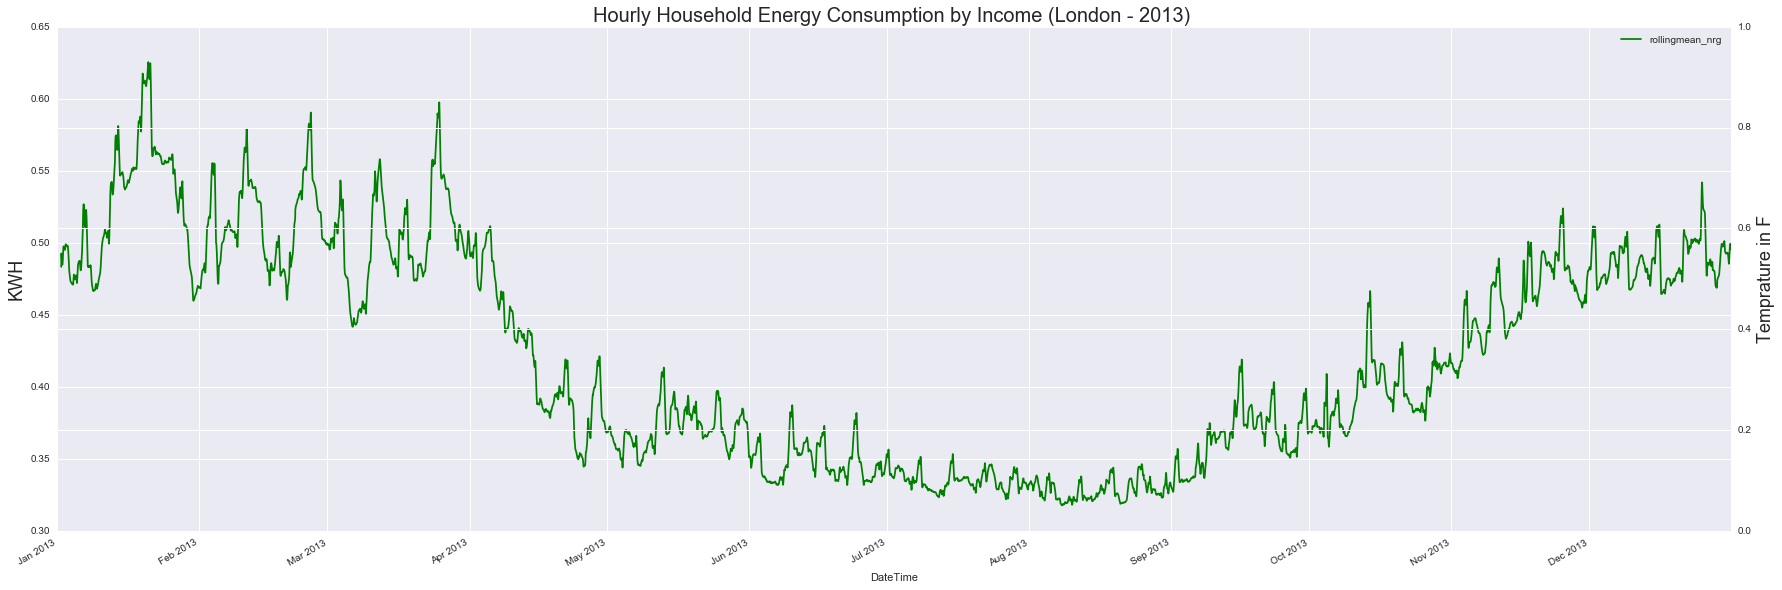

In [92]:
ax1 = pl.figure(figsize=(30,10)).add_subplot(111)
ax2 = ax1.twinx()
final2013.plot(x=final2013.index, y='rollingmean_nrg', color='Green',alpha=1, ax=ax1)
#final2013.plot(x=final2013.index, y='rollingmean_temp', fontsize=16, color='orange', alpha=1, ax=ax2)
pl.title('Hourly Household Energy Consumption by Income (London - 2013) ', fontsize=20)
ax1.set_ylabel("KWH", fontsize=18)
ax2.set_ylabel("Temprature in F", fontsize=18)
pl.xlabel("Date Time", fontsize=18)
#pl.xlim(500,548)

In [93]:
len(final2013)

8743

In [24]:
#OLS of Low_Income ~ Temperature_F
regress1 = smf.ols(formula = 'Low_Income ~ Temperature_F', data = final2013_14).fit()
print ('pvalue for temperature vs low income is ', regress1.pvalues[1])
regress1.summary()

pvalue for temperature vs low income is  1.02315130986e-11


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             Low_Income   R-squared:                       0.021
Model:                            OLS   Adj. R-squared:                  0.021
Method:                 Least Squares   F-statistic:                     46.80
Date:                Fri, 02 Dec 2016   Prob (F-statistic):           1.02e-11
Time:                        15:40:45   Log-Likelihood:                 1387.7
No. Observations:                2135   AIC:                            -2771.
Df Residuals:                    2133   BIC:                            -2760.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.2362      0.026      9.192      0.000         0.186     0.287
Temperature_F     0.0039      0.001      6.841      0.000         0.003     0.005
==============================================================================
Omnibus:                      221.291   Durbin-Watson:                   0.158
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               82.730
Skew:                           0.250   Prob(JB):                     1.08e-18
Kurtosis:                       2.175   Cond. No.                         425.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

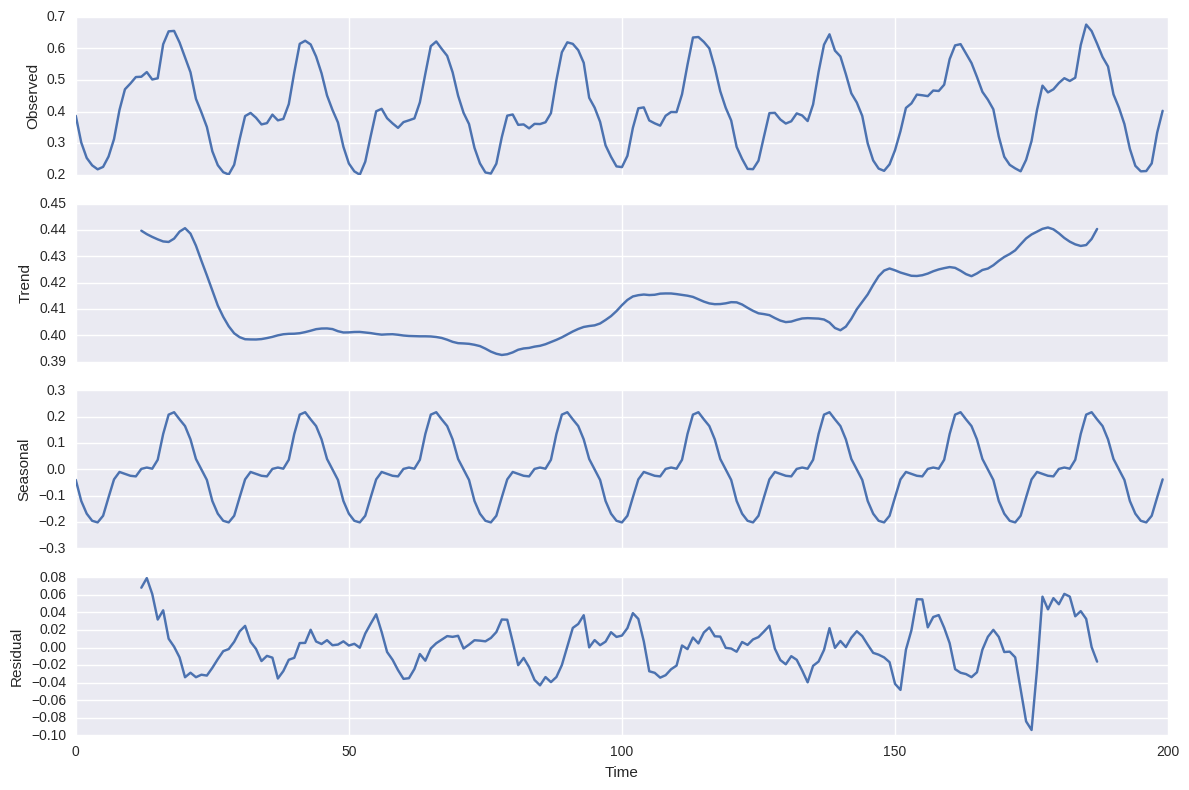

In [81]:
##Seasonal Decomposition of low income energy

import statsmodels.api as sm

data = np.array(final2013_14.Low_Income)


res = sm.tsa.seasonal_decompose(data[:200], freq = 24)
plt.rcParams['figure.figsize'] = (12,8)
resplot = res.plot()

In [48]:
len(res.trend)

2135

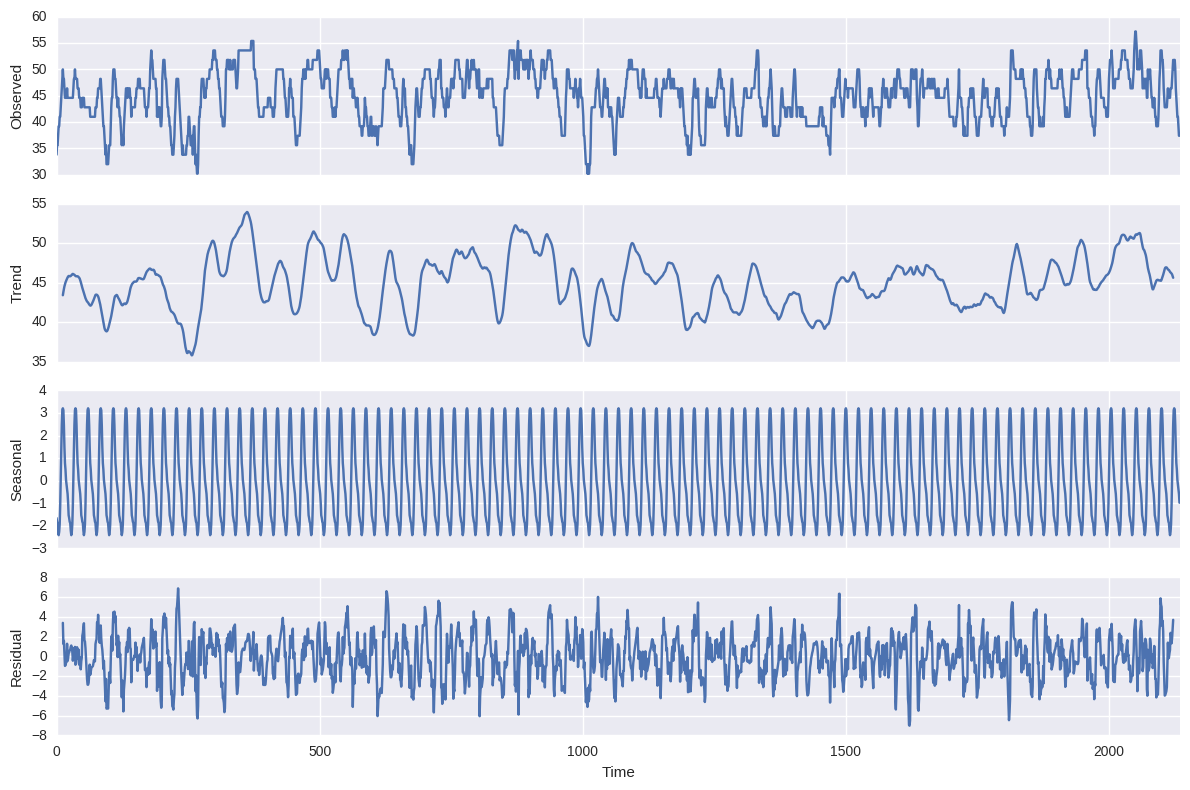

In [53]:
##Seasonal Decomposition of temperature
data1 = np.array(final2013_14.Temperature_F)

#Seasonal Decomposition using statsmodels api
res1 = sm.tsa.seasonal_decompose(data1, freq = 24)
plt.rcParams['figure.figsize'] = (12,8)
resplot = res1.plot()

In [68]:
#Adding the trends to dataframe
final2013_14['LI_trend'] = res.trend
final2013_14['temp_trend'] = res1.trend * 0.01
final2013_14['LI_resid'] = res.resid
final2013_14['temp_resid'] = res1.resid * 0.01
final2013_14.head(30)

index  Dew_Point_F  Temperature_F Wind_Speed_MPH  Low_Income  \
0  2013-12-01 01:00:00         33.8           33.8            4.6    0.386444   
1  2013-12-01 02:00:00         33.8           35.6            4.6    0.301773   
2  2013-12-01 03:00:00         35.6           35.6            4.6    0.253057   
3  2013-12-01 04:00:00         35.6           37.4            8.1    0.229611   
4  2013-12-01 05:00:00         37.4           39.2            4.6    0.217060   
5  2013-12-01 06:00:00         37.4           39.2            3.5    0.224744   
6  2013-12-01 07:00:00         37.4           41.0            5.8    0.257580   
7  2013-12-01 08:00:00         39.2           41.0            4.6    0.312774   
8  2013-12-01 09:00:00         39.2           42.8            4.6    0.404882   
9  2013-12-01 10:00:00         41.0           44.6            4.6    0.470331   
10 2013-12-01 11:00:00         42.8           46.4            5.8    0.488635   
11 2013-12-01 12:00:00         42.8           48.2            5.8    0.509109   
12 2013-12-01 13:00:00         42.8           50.0            3.5    0.510081   
13 2013-12-01 14:00:00         42.8           48.2            4.6    0.524822   
14 2013-12-01 15:00:00         42.8           48.2            2.3    0.501308   
15 2013-12-01 16:00:00         41.0           46.4            2.3    0.505158   
16 2013-12-01 17:00:00         41.0           44.6            3.5    0.612842   
17 2013-12-01 18:00:00         41.0           44.6            2.3    0.653707   
18 2013-12-01 19:00:00         42.8           44.6            3.5    0.655094   
19 2013-12-01 20:00:00         42.8           44.6            2.3    0.618435   
20 2013-12-01 21:00:00         42.8           46.4            4.6    0.571675   
21 2013-12-01 22:00:00         42.8           44.6           Calm    0.524154   
22 2013-12-01 23:00:00         42.8           44.6            2.3    0.440100   
23 2013-12-02 00:00:00         42.8           44.6            2.3    0.397325   
24 2013-12-02 01:00:00         42.8           44.6            2.3    0.351083   
25 2013-12-02 02:00:00         42.8           44.6           Calm    0.274224   
26 2013-12-02 03:00:00         42.8           44.6            2.3    0.230204   
27 2013-12-02 04:00:00         42.8           44.6            3.5    0.207940   
28 2013-12-02 05:00:00         42.8           44.6            2.3    0.200631   
29 2013-12-02 06:00:00         42.8           44.6            3.5    0.231491   

    High_Income  Middle_Income  LI_trend  temp_trend  LI_resid  temp_resid  
0      0.479599       0.424813       NaN         NaN       NaN         NaN  
1      0.381671       0.314566       NaN         NaN       NaN         NaN  
2      0.335496       0.263379       NaN         NaN       NaN         NaN  
3      0.312186       0.252521       NaN         NaN       NaN         NaN  
4      0.305041       0.253142       NaN         NaN       NaN         NaN  
5      0.325707       0.258932       NaN         NaN       NaN         NaN  
6      0.371590       0.294611       NaN         NaN       NaN         NaN  
7      0.473897       0.369425       NaN         NaN       NaN         NaN  
8      0.625931       0.486330       NaN         NaN       NaN         NaN  
9      0.685477       0.540041       NaN         NaN       NaN         NaN  
10     0.705744       0.538855       NaN         NaN       NaN         NaN  
11     0.701098       0.572428       NaN         NaN       NaN         NaN  
12     0.726956       0.576482  0.439709    0.434000  0.061599    0.033888  
13     0.752491       0.589289  0.438399    0.438125  0.079374    0.012632  
14     0.708125       0.564777  0.437349    0.441875  0.049733    0.015675  
15     0.710642       0.626465  0.436421    0.445250 -0.001074    0.003952  
16     0.894522       0.733226  0.435627    0.447875  0.003337   -0.009689  
17     1.047987       0.831068  0.435426    0.450125 -0.005306   -0.009045  
18     1.121351       0.834183  0.436700  

In [75]:
#OLS LI_trend ~ Temperature_F
regress4 = smf.ols(formula = 'LI_resid ~ temp_trend', data = final2013_14).fit()
print ('pvalue for temperature vs low income is ', regress4.pvalues[1])
regress4.summary()

pvalue for temperature vs low income is  0.982092982289


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LI_resid   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                 0.0005039
Date:                Fri, 02 Dec 2016   Prob (F-statistic):              0.982
Time:                        17:54:36   Log-Likelihood:                 3825.0
No. Observations:                2111   AIC:                            -7646.
Df Residuals:                    2109   BIC:                            -7635.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept      0.0003      0.011      0.031      0.975        -0.022     0.022
temp_trend    -0.0006      0.025     -0.022      0.982        -0.049     0.048
==============================================================================
Omnibus:                       41.038   Durbin-Watson:                   0.380
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.936
Skew:                           0.230   Prob(JB):                     7.14e-13
Kurtosis:                       3.652   Cond. No.                         34.8
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

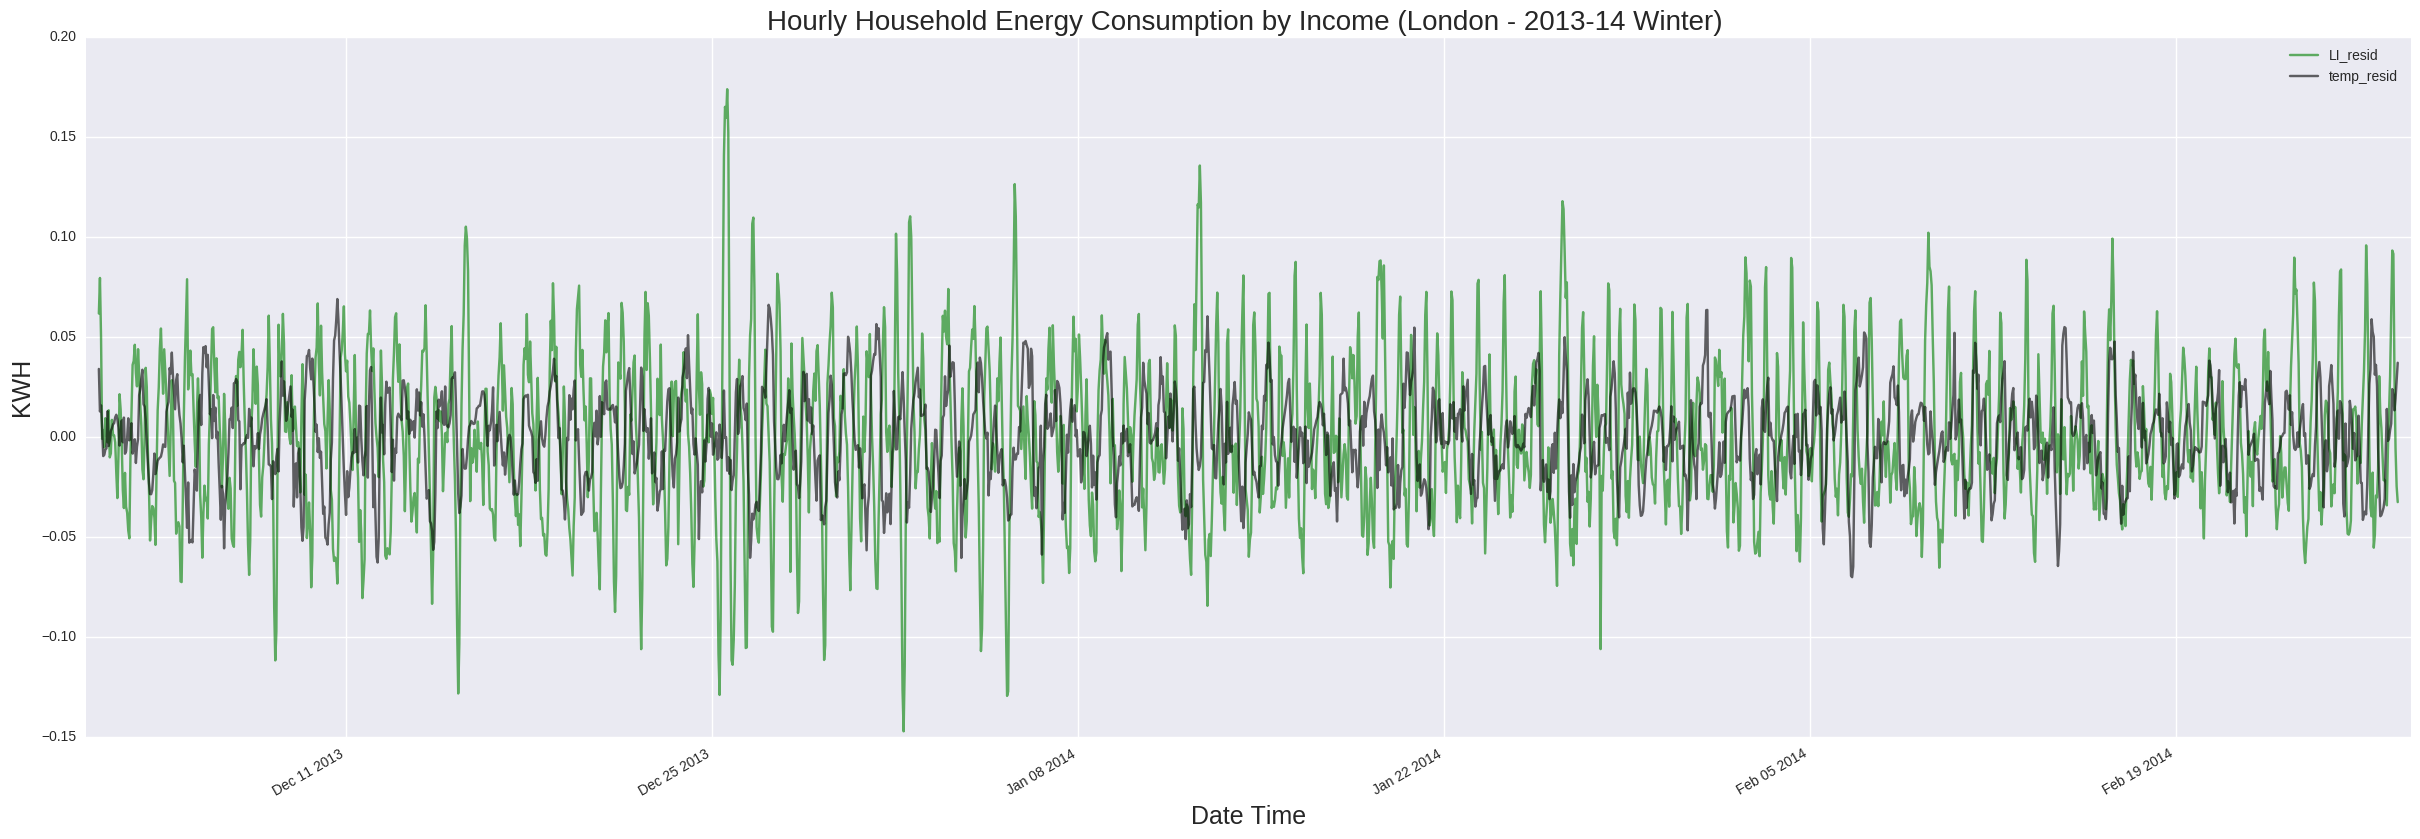

In [73]:
#plotting LI_trend and Temperature_F
ax = pl.figure(figsize=(30,10)).add_subplot(111)
final2013_14.plot(x='index', y='LI_resid', color='Green',alpha=.6, ax=ax)
final2013_14.plot(x='index', y='temp_resid', color='black',alpha=.6, ax=ax)
pl.title('Hourly Household Energy Consumption by Income (London - 2013-14 Winter) ', fontsize=20)
pl.ylabel("KWH", fontsize=18)
pl.xlabel("Date Time", fontsize=18)

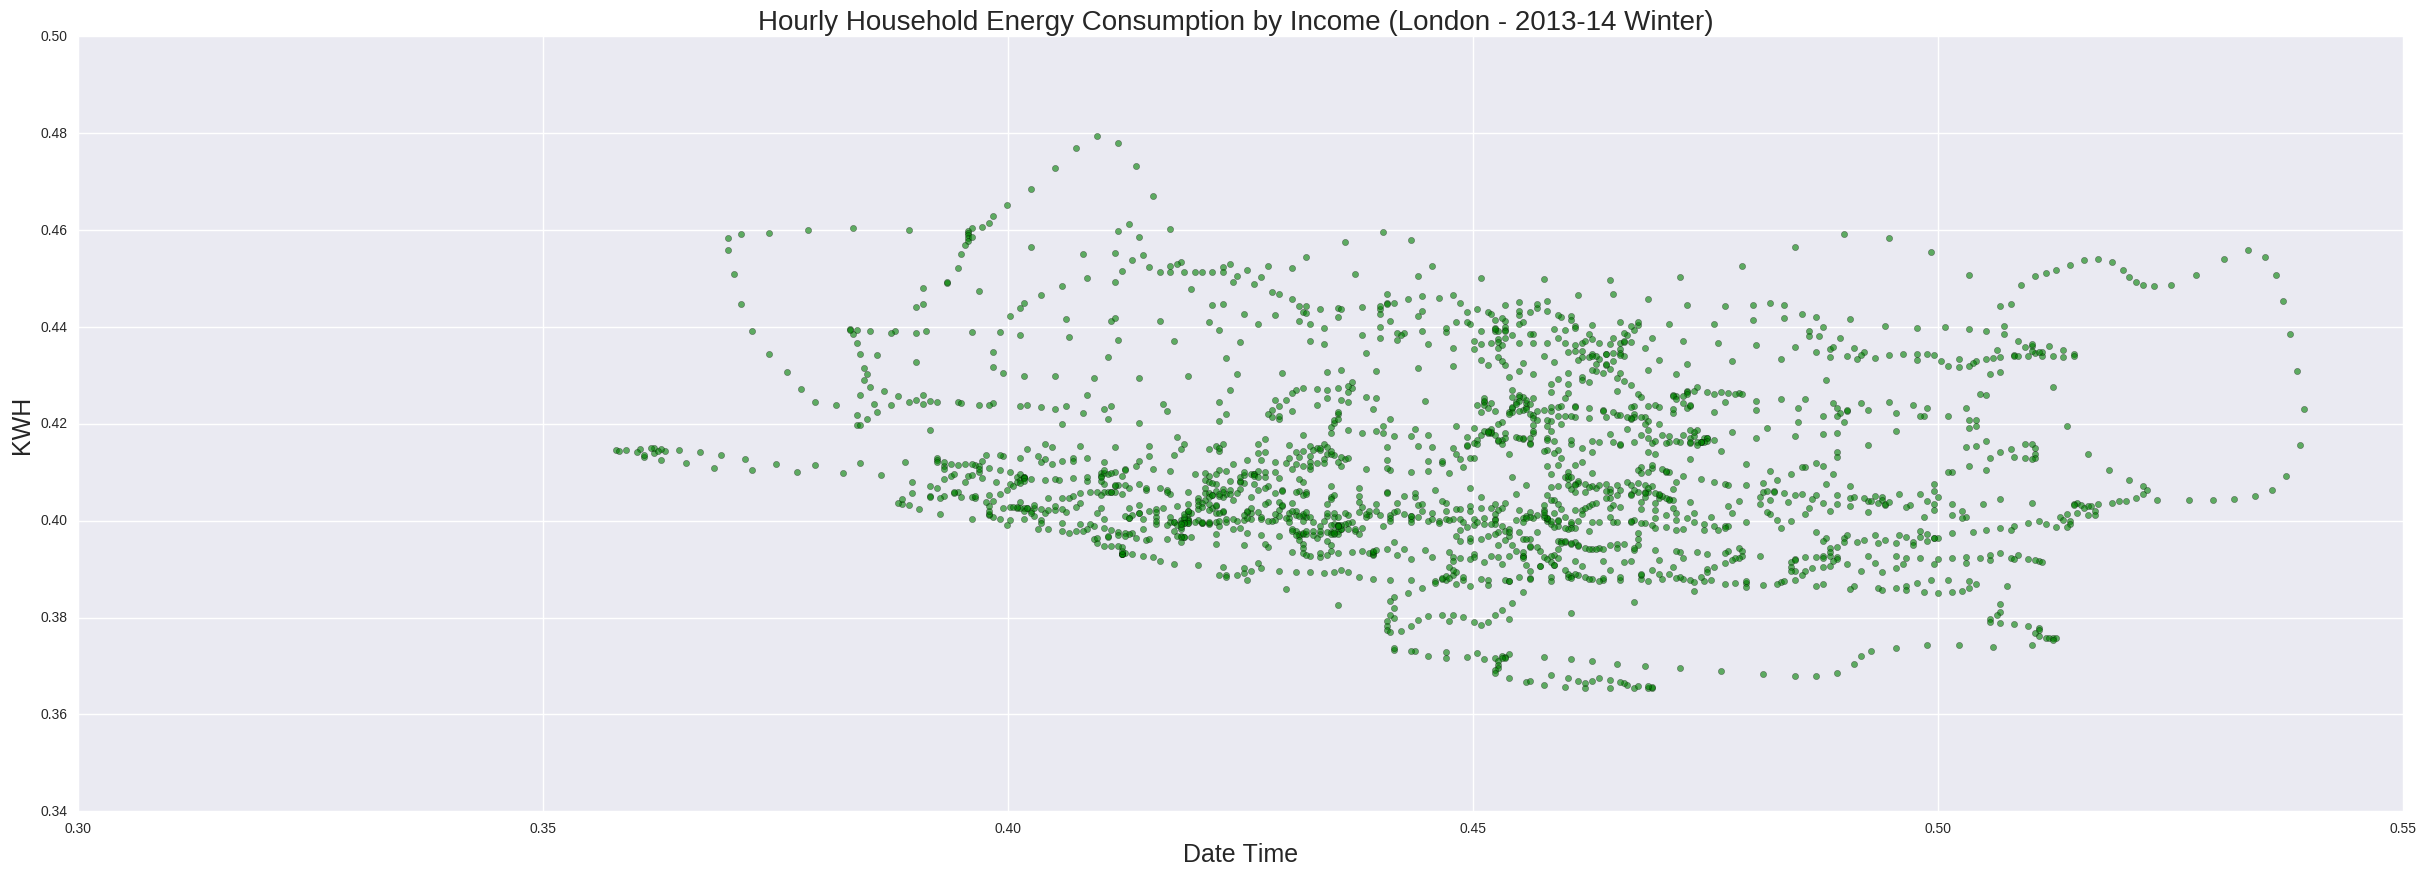

In [78]:
#plotting temperature vs low income energy trend
ax = pl.figure(figsize=(30,10)).add_subplot(111)
final2013_14.plot(kind='scatter', x='temp_trend', y='LI_trend', color='Green',alpha=.6, ax=ax)
#final2013_14.plot(x='index', y='Temperature_F', color='black',alpha=.6, ax=ax)
pl.title('Hourly Household Energy Consumption by Income (London - 2013-14 Winter) ', fontsize=20)
pl.ylabel("KWH", fontsize=18)
pl.xlabel("Date Time", fontsize=18)

In [69]:
#OLS LI_resid ~ Temperature_F
regress3 = smf.ols(formula = 'LI_resid ~ Temperature_F', data = final2013_14).fit()
print ('pvalue for temperature vs low income resid is ', regress3.pvalues[1])
regress3.summary()

pvalue for temperature vs low income resid is  0.404415177985


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               LI_resid   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                    0.6954
Date:                Fri, 02 Dec 2016   Prob (F-statistic):              0.404
Time:                        17:48:49   Log-Likelihood:                 3825.3
No. Observations:                2111   AIC:                            -7647.
Df Residuals:                    2109   BIC:                            -7635.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [95.0% Conf. Int.]
---------------------------------------------------------------------------------
Intercept         0.0068      0.008      0.841      0.400        -0.009     0.023
Temperature_F    -0.0001      0.000     -0.834      0.404        -0.001     0.000
==============================================================================
Omnibus:                       41.266   Durbin-Watson:                   0.380
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               56.821
Skew:                           0.228   Prob(JB):                     4.59e-13
Kurtosis:                       3.663   Cond. No.                         426.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

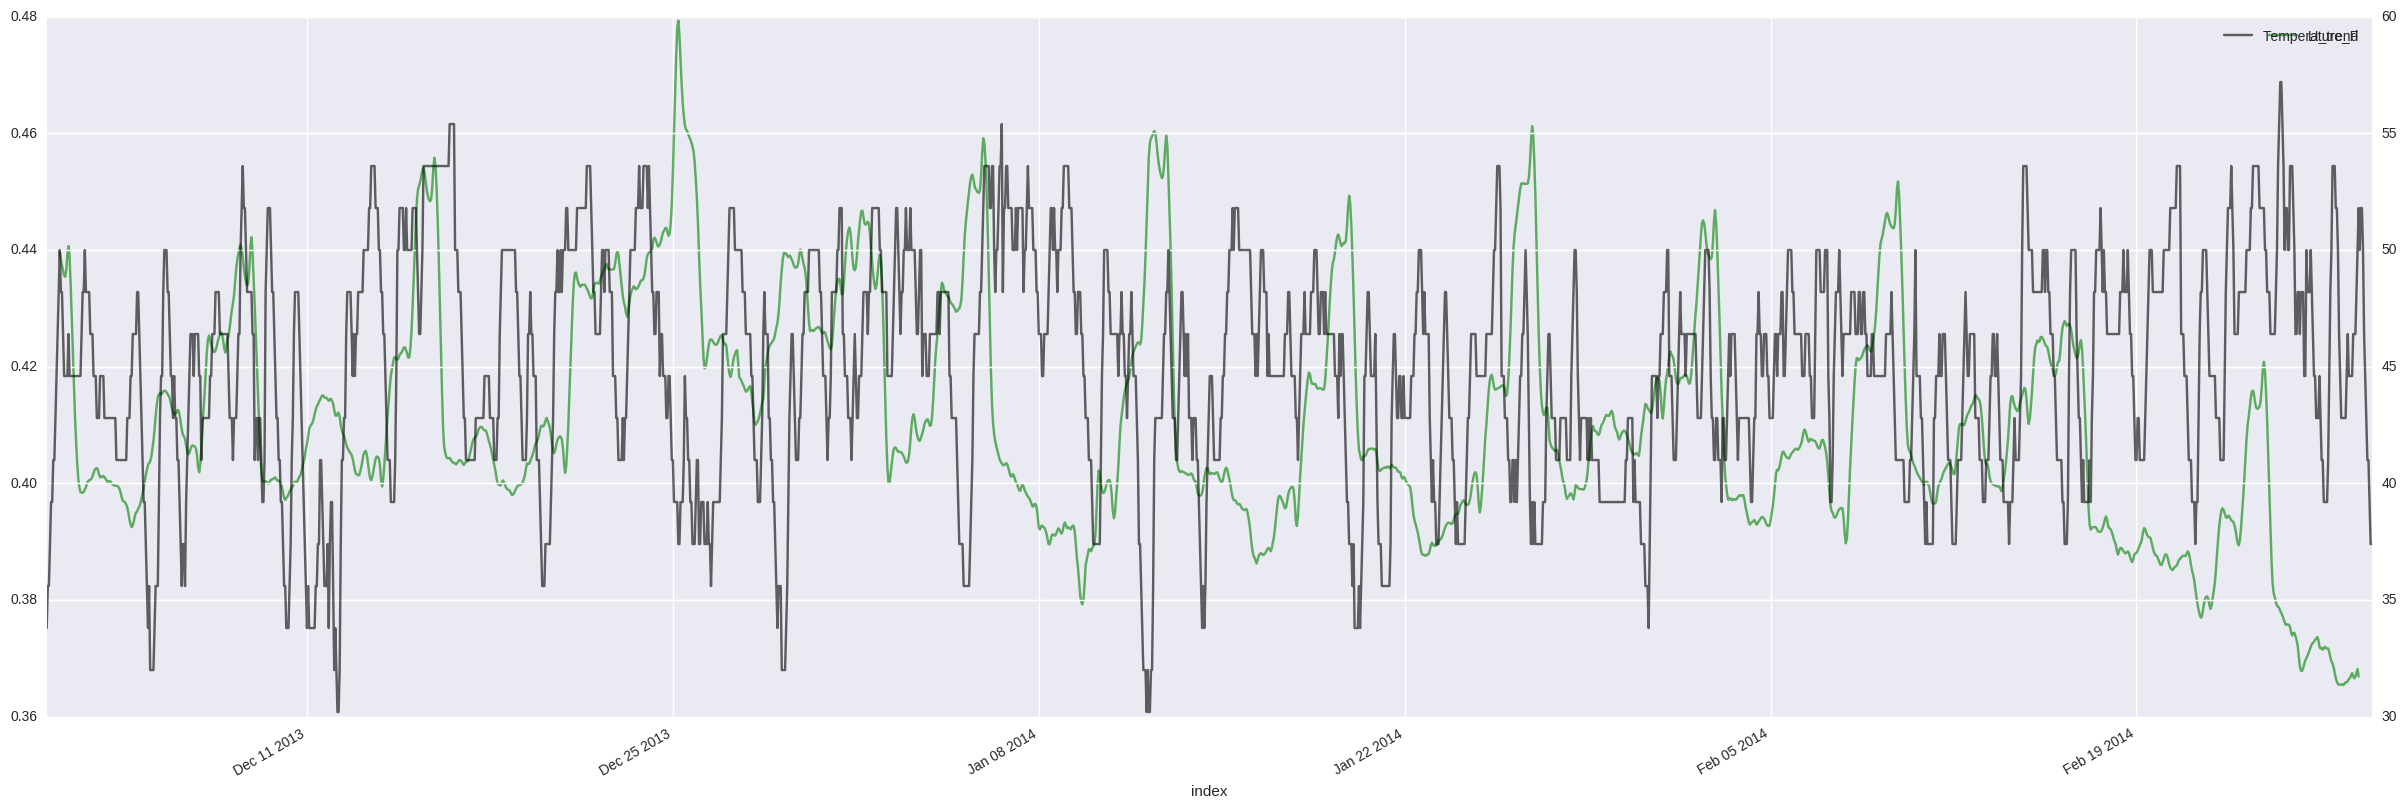

In [64]:
#plotting LI_trend and Temperature_F
ax = pl.figure(figsize=(30,10)).add_subplot(111)
final2013_14.plot(x='index', y='LI_trend', color='Green',alpha=.6, ax=ax)
final2013_14.plot(x='index', y='Temperature_F', color='black',alpha=.6, ax=ax)
pl.title('Hourly Household Energy Consumption by Income (London - 2013-14 Winter) ', fontsize=20)
pl.ylabel("KWH", fontsize=18)
pl.xlabel("Date Time", fontsize=18)

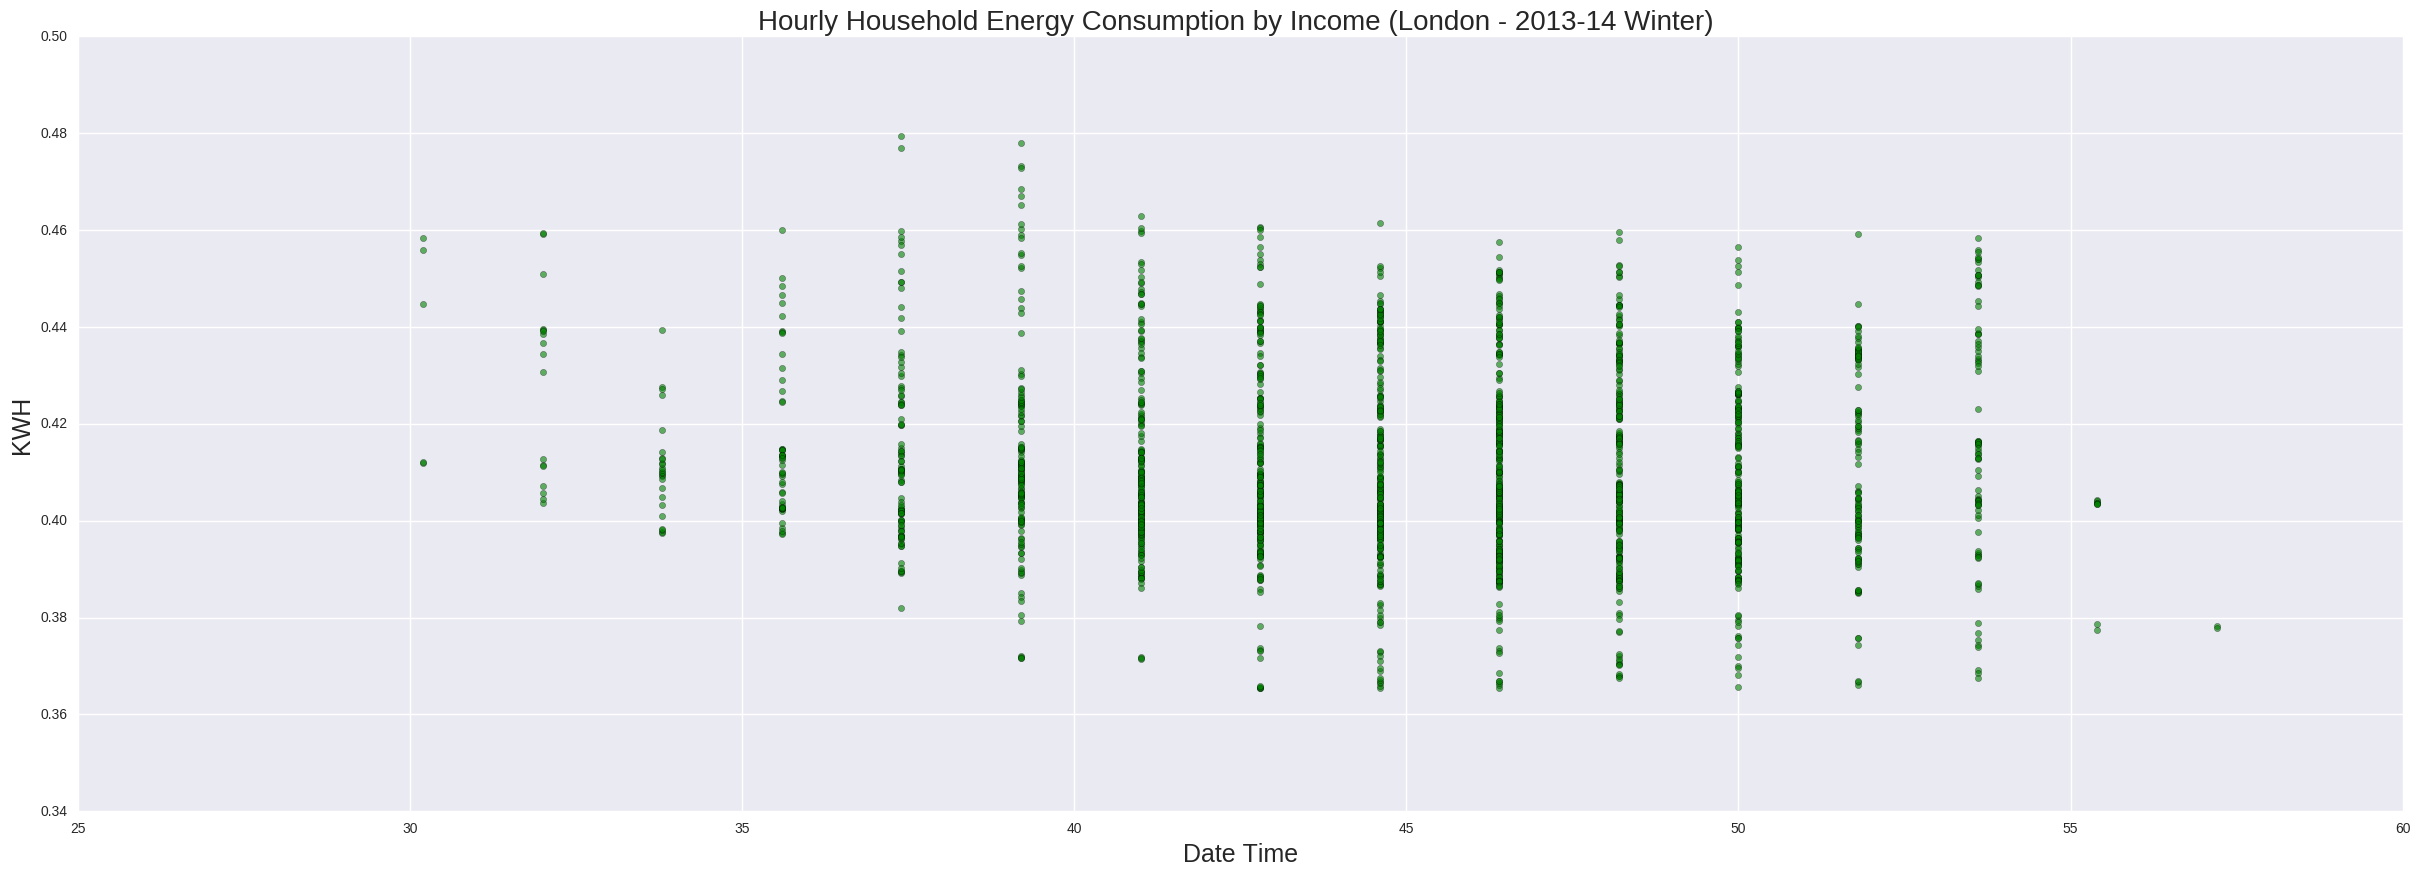

In [67]:
#plotting temperature vs low income energy trend
ax = pl.figure(figsize=(30,10)).add_subplot(111)
final2013_14.plot(kind='scatter', x='Temperature_F', y='LI_trend', color='Green',alpha=.6, ax=ax)
#final2013_14.plot(x='index', y='Temperature_F', color='black',alpha=.6, ax=ax)
pl.title('Hourly Household Energy Consumption by Income (London - 2013-14 Winter) ', fontsize=20)
pl.ylabel("KWH", fontsize=18)
pl.xlabel("Date Time", fontsize=18)

In [ ]:
## fourier analysis below

In [37]:
#cutting data
final2013_14_ = final2013_14.iloc[:200]
final2013_14_.drop('Wind_Speed_MPH', 1, inplace=True)

/opt/rh/anaconda/root/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [38]:
final2013_14_

index  Dew_Point_F  Temperature_F  Low_Income  High_Income  \
0   2013-12-01 01:00:00         33.8           33.8    0.386444     0.479599   
1   2013-12-01 02:00:00         33.8           35.6    0.301773     0.381671   
2   2013-12-01 03:00:00         35.6           35.6    0.253057     0.335496   
3   2013-12-01 04:00:00         35.6           37.4    0.229611     0.312186   
4   2013-12-01 05:00:00         37.4           39.2    0.217060     0.305041   
5   2013-12-01 06:00:00         37.4           39.2    0.224744     0.325707   
6   2013-12-01 07:00:00         37.4           41.0    0.257580     0.371590   
7   2013-12-01 08:00:00         39.2           41.0    0.312774     0.473897   
8   2013-12-01 09:00:00         39.2           42.8    0.404882     0.625931   
9   2013-12-01 10:00:00         41.0           44.6    0.470331     0.685477   
10  2013-12-01 11:00:00         42.8           46.4    0.488635     0.705744   
11  2013-12-01 12:00:00         42.8           48.2    0.509109     0.701098   
12  2013-12-01 13:00:00         42.8           50.0    0.510081     0.726956   
13  2013-12-01 14:00:00         42.8           48.2    0.524822     0.752491   
14  2013-12-01 15:00:00         42.8           48.2    0.501308     0.708125   
15  2013-12-01 16:00:00         41.0           46.4    0.505158     0.710642   
16  2013-12-01 17:00:00         41.0           44.6    0.612842     0.894522   
17  2013-12-01 18:00:00         41.0           44.6    0.653707     1.047987   
18  2013-12-01 19:00:00         42.8           44.6    0.655094     1.121351   
19  2013-12-01 20:00:00         42.8           44.6    0.618435     1.113377   
20  2013-12-01 21:00:00         42.8           46.4    0.571675     0.968883   
21  2013-12-01 22:00:00         42.8           44.6    0.524154     0.885282   
22  2013-12-01 23:00:00         42.8           44.6    0.440100     0.734775   
23  2013-12-02 00:00:00         42.8           44.6    0.397325     0.540749   
24  2013-12-02 01:00:00         42.8           44.6    0.351083     0.406156   
25  2013-12-02 02:00:00         42.8           44.6    0.274224     0.333431   
26  2013-12-02 03:00:00         42.8           44.6    0.230204     0.306380   
27  2013-12-02 04:00:00         42.8           44.6    0.207940     0.303576   
28  2013-12-02 05:00:00         42.8           44.6    0.200631     0.301431   
29  2013-12-02 06:00:00         42.8           44.6    0.231491     0.330403   
..                  ...          ...            ...         ...          ...   
170 2013-12-08 03:00:00         41.0           42.8    0.256754     0.323995   
171 2013-12-08 04:00:00         39.2           41.0    0.231232     0.312252   
172 2013-12-08 05:00:00         41.0           42.8    0.220075     0.301715   
173 2013-12-08 06:00:00         41.0           42.8    0.210767     0.317083   
174 2013-12-08 07:00:00         41.0           42.8    0.246972     0.376227   
175 2013-12-08 08:00:00         41.0           44.6    0.306716     0.487918   
176 2013-12-08 09:00:00         42.8           46.4    0.405173     0.595138   
177 2013-12-08 10:00:00         42.8           46.4    0.481825     0.697720   
178 2013-12-08 11:00:00         44.6           50.0    0.460479     0.676118   
179 2013-12-08 12:00:00         44.6           51.8    0.470298     0.664395   
180 2013-12-08 13:00:00         44.6           53.6    0.490247     0.665281   
181 2013-12-08 14:00:00         44.6           51.8    0.505418     0.668849   
182 2013-12-08 15:00:00         46.4           51.8    0.496577     0.636084   
183 2013-12-08 16:00:00         44.6           50.0    0.506988     0.711035   
184 2013-12-08 17:00:00         44.6           48.2    0.610192     0.927111   
185 2013-12-08 18:00:00         44.6           48.2    0.675134     1.027605   
186 2013-12-08 19:00:00         44.6           48.2    0.654483     1.116700   
187 2013-12-08 20:00:00         44.6           48.2    0.614621     1.100836   
188 2013-12-08 21:

In [39]:
fourier = []
for column in final2013_14_:
    ft = np.abs(np.fft.rfft(final2013_14_[column]))
    fourier.append({'station_id': column, 'yr_periodicity_score': ft[4]})
    
df_ft = pd.DataFrame(fourier).sort_values(by='yr_periodicity_score', ascending=False)
(df_ft)

station_id  yr_periodicity_score
0          index          5.733350e+15
2  Temperature_F          1.415394e+02
1    Dew_Point_F          7.285038e+01
4    High_Income          2.736627e+00
5  Middle_Income          1.644355e+00
3     Low_Income          1.456327e+00

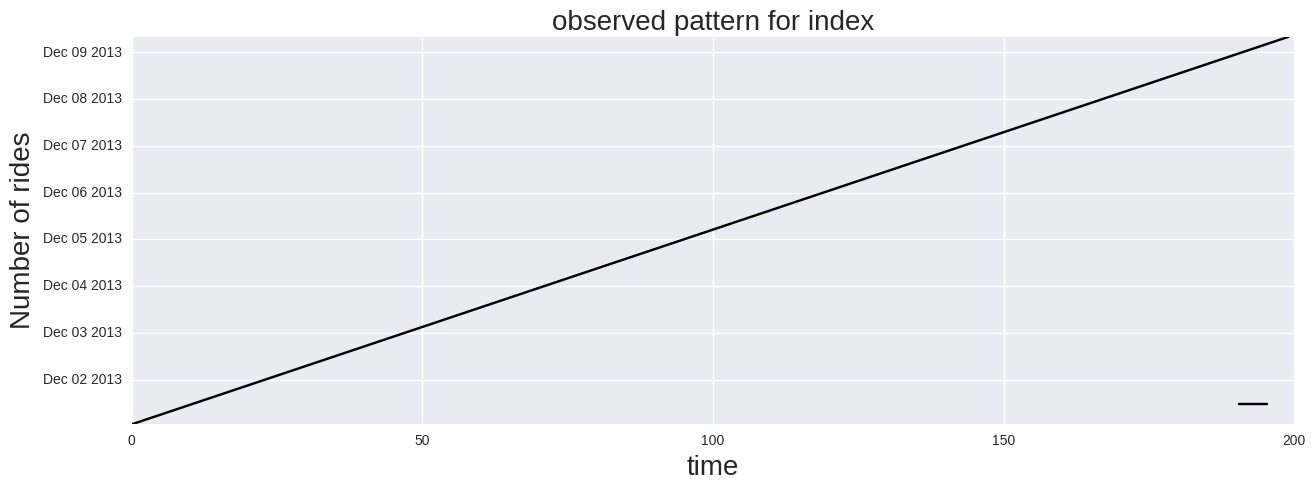

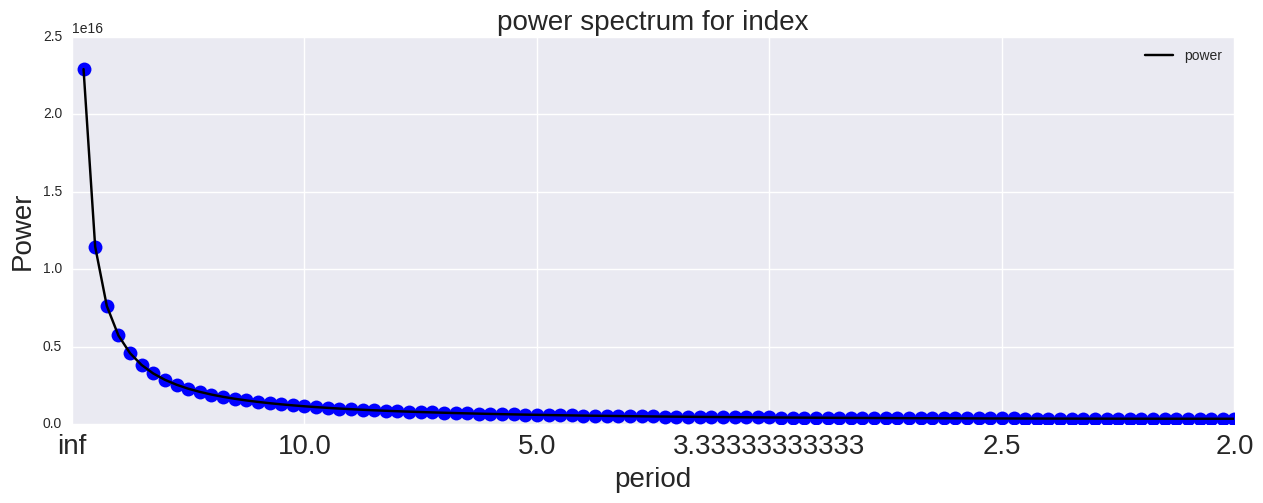

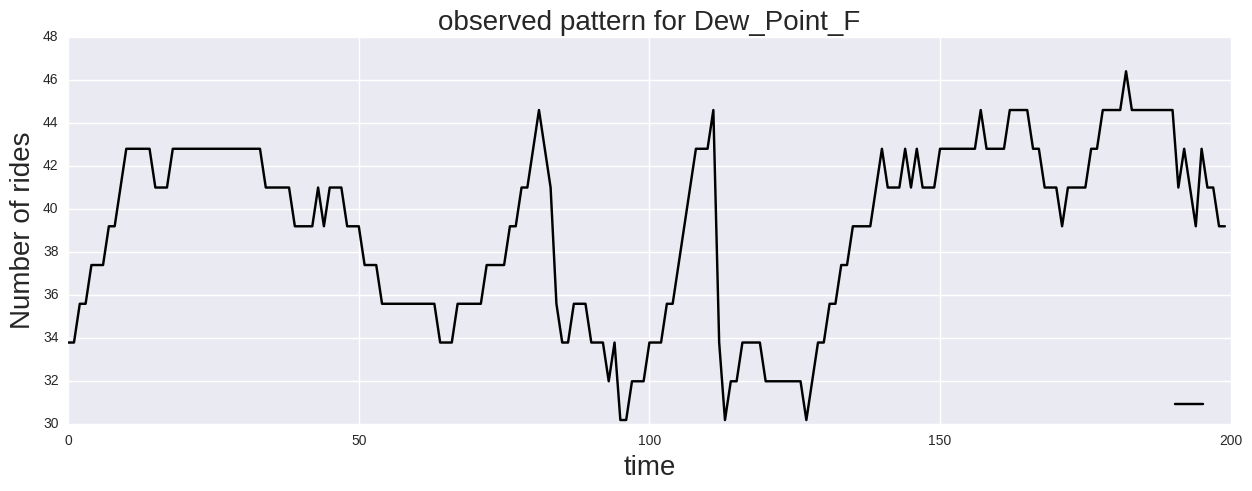

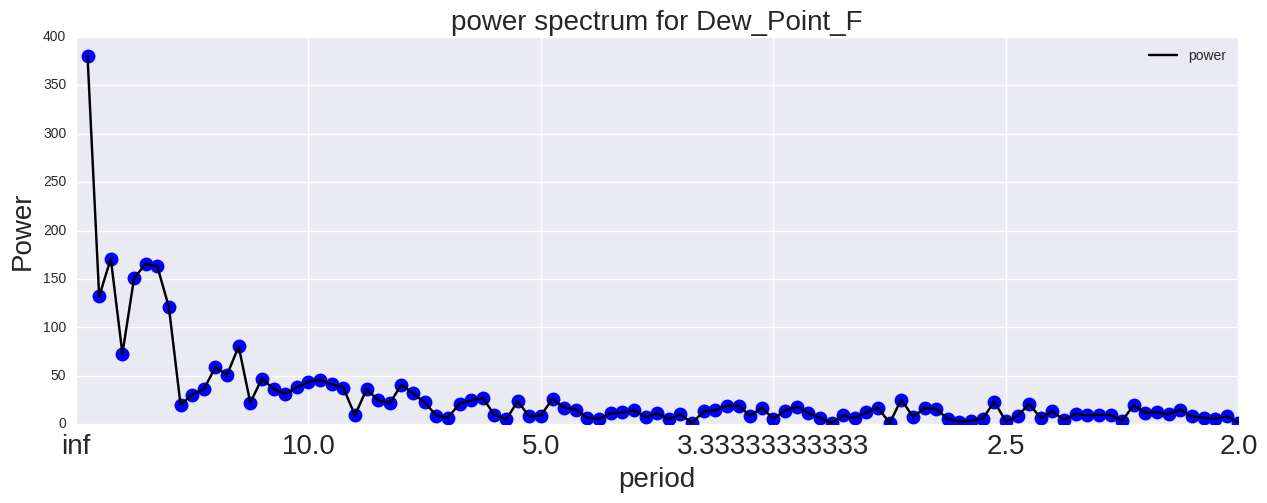

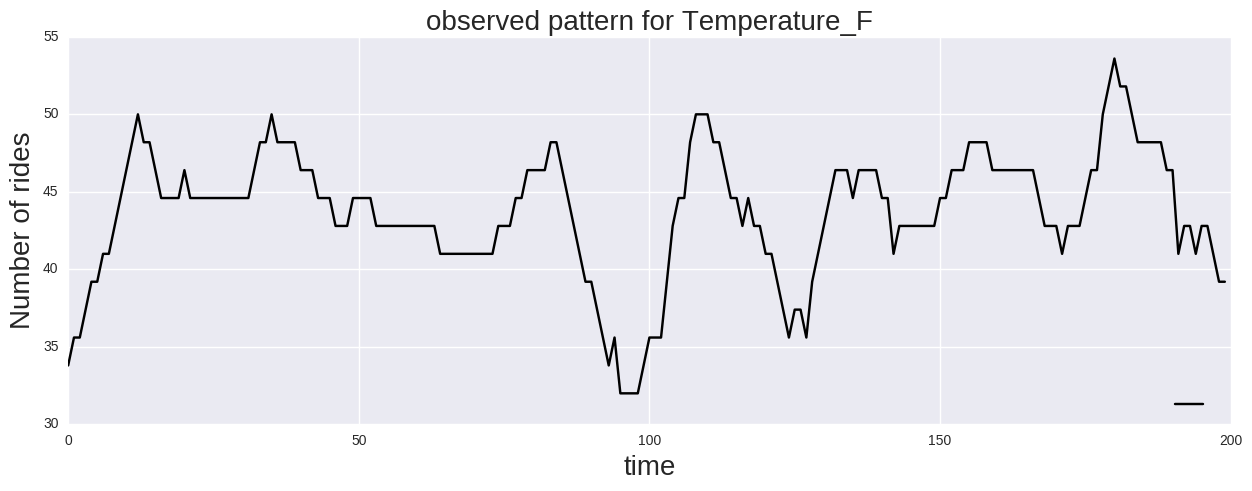

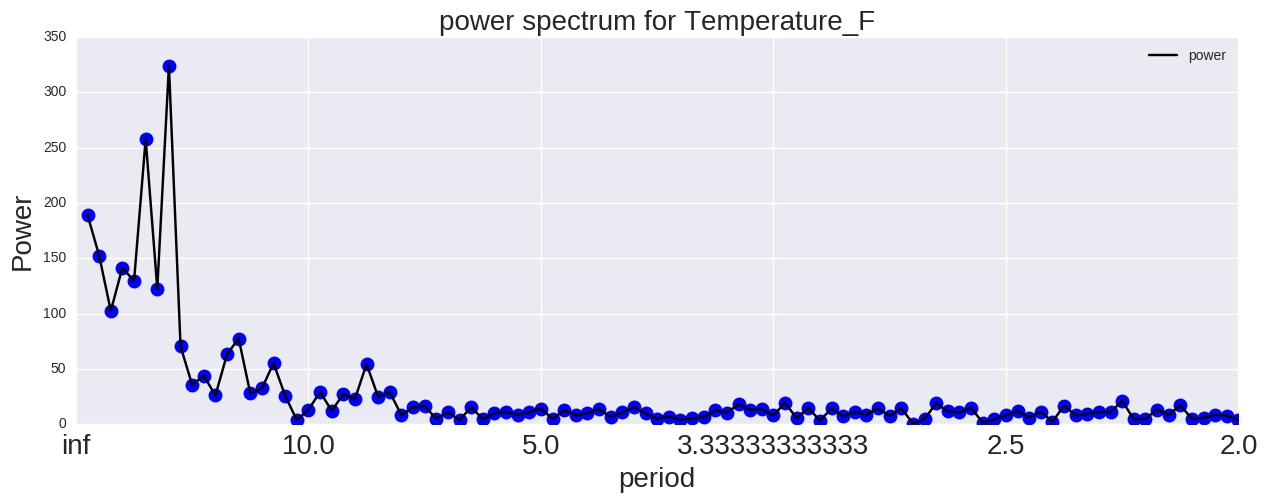

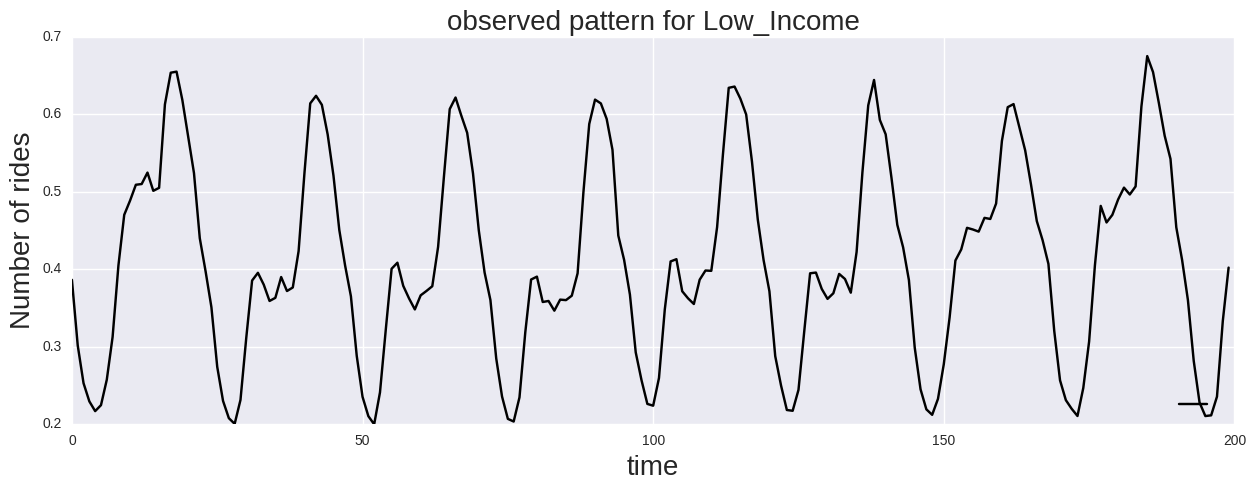

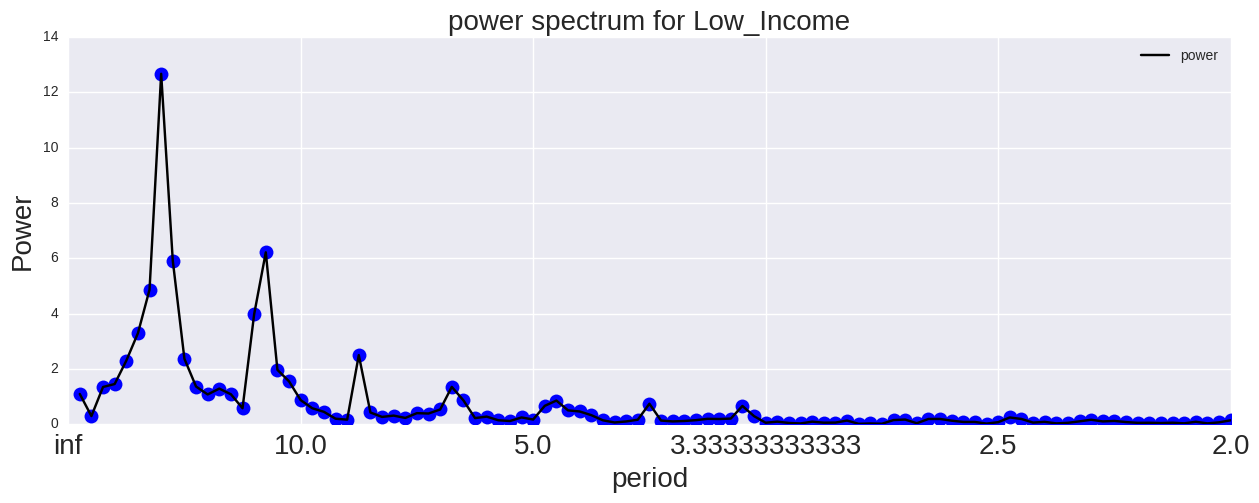

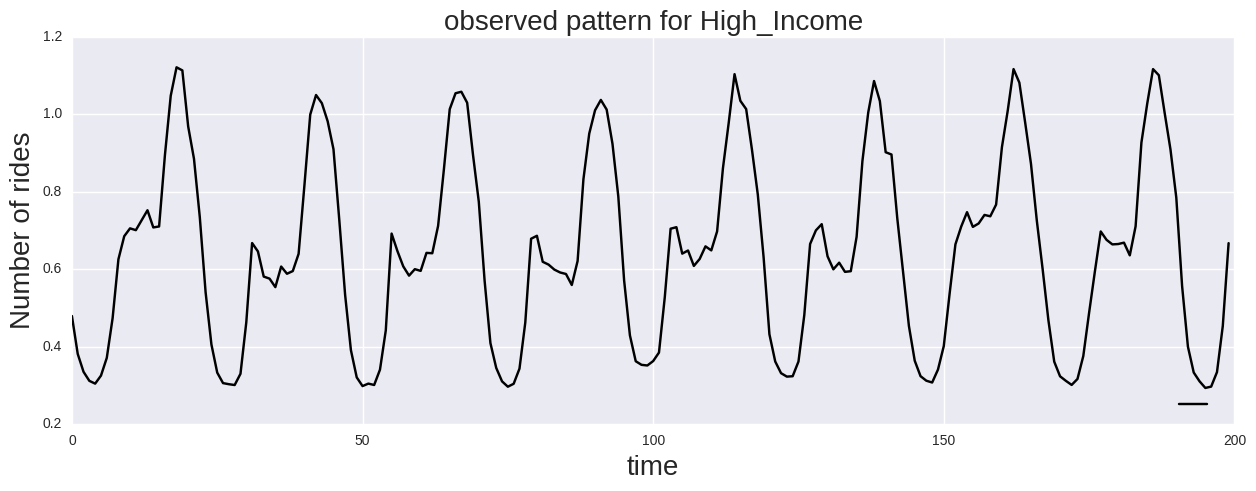

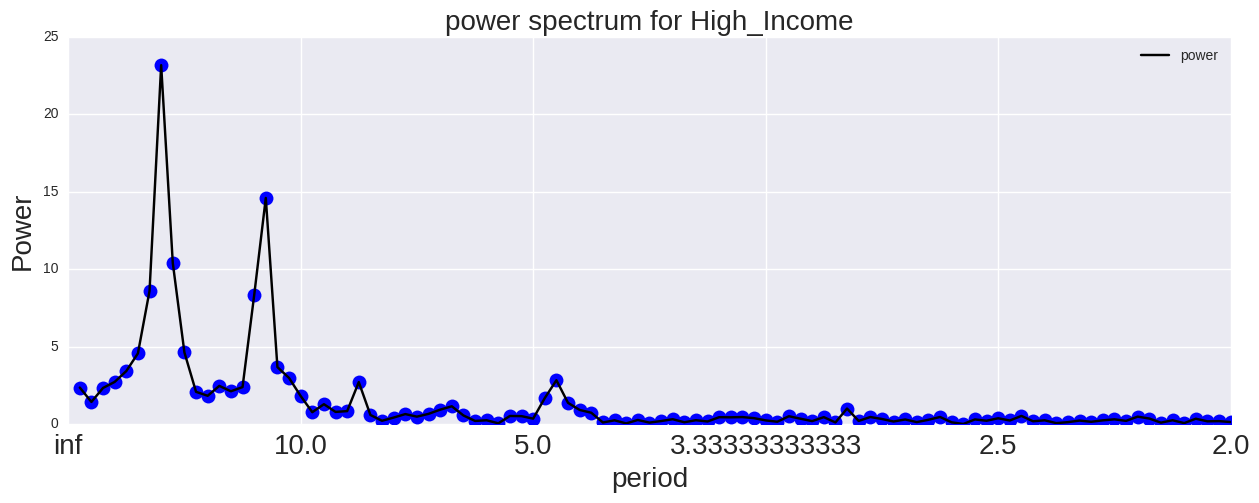

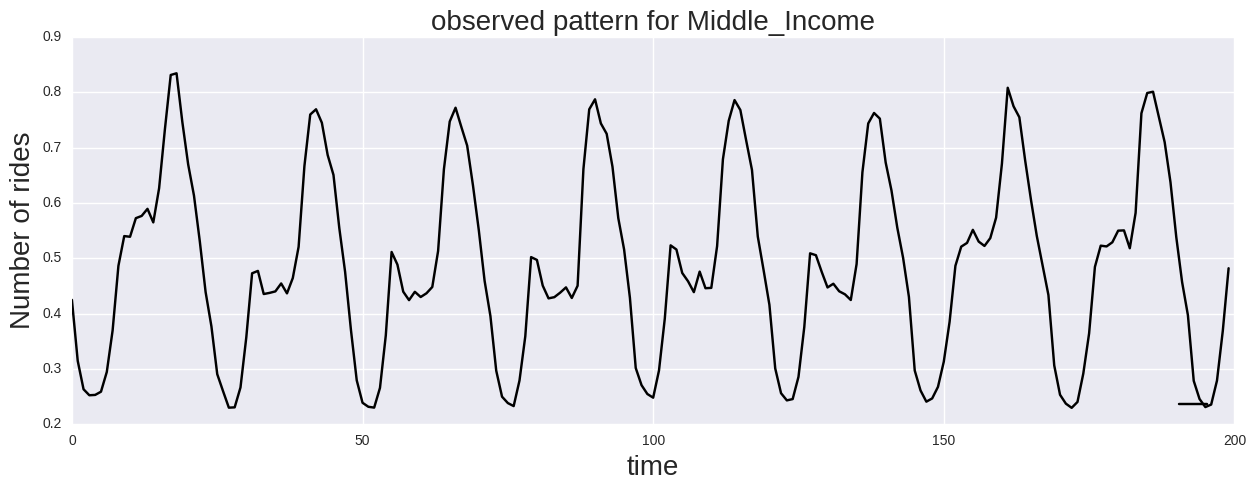

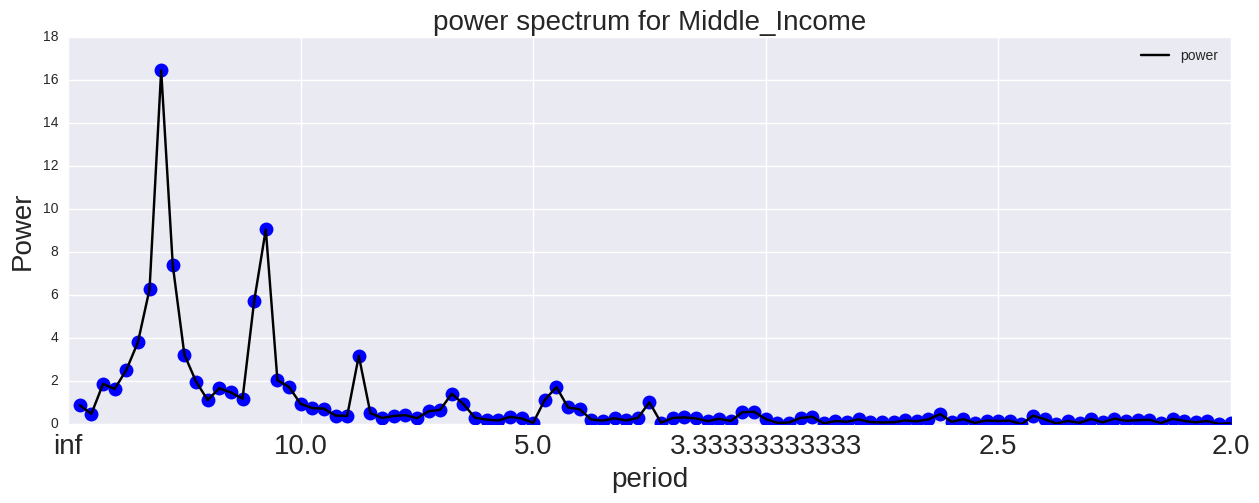

In [40]:
#plotting fourier results
for column in final2013_14_:
    ft = np.abs(np.fft.rfft(final2013_14_[column]))
    N = len(final2013_14_)
    # ploting rides
    fx = pl.figure(figsize=(15,5)).add_subplot(111)
    fx.plot(final2013_14_[column], color='black', label=' ')
    fx.set_title('observed pattern for %s'%(column), fontsize = 20)
    fx.set_ylabel("Number of rides", fontsize=20)
    fx.set_xlabel("time", fontsize=20)
    fx.legend(loc=4)
    # ploting power spectrum from furnier transformation
    ax=pl.figure(figsize=(15,5)).add_subplot(111)
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (ft[1:]), 'bo', ms=10)
    #ax.plot(np.fft.rfftfreq(N, 1.0)[4], (ft[4]), 'ro', ms=20, label='52nd week')
    ax.plot(np.fft.rfftfreq(N, 1.0)[1:], (ft[1:]), color ='black', label = 'power')
    ax.get_xticks(minor=True)
    ax.set_xticklabels([ "%s"%(1/f) for f in ax.get_xticks()], fontsize=20)
    ax.legend(loc=1)
    pl.xlabel("period", fontsize=20)
    pl.ylabel("Power", fontsize=20)
    pl.title("power spectrum for %s"%(column), fontsize=20)